In [117]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [171]:
a = pd.read_excel("E:DISEASE PREDICTION.xlsx")

In [172]:
a.head()

,Date,Patient_ID,screen_no,Age,Gender,City,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,...,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease
0,2015-05-14,12-1101,1,39,F,Hyderabad,0.0,0.0,0.0,0.0,...,0.0,N,N,0.0,0.0,N,N,0,19.25,Healthy
1,2015-05-14,12-1102,1,34,F,Hyderabad,0.0,0.0,0.0,0.0,...,0.0,N,N,0.0,0.0,N,N,0,18.86,Healthy
2,2015-05-14,12-1103,1,74,F,Hyderabad,0.0,0.0,0.0,0.0,...,0.0,N,N,0.0,0.0,N,N,0,18.83,DB
3,2015-05-14,12-1105,1,39,F,Hyderabad,0.0,0.0,0.0,0.0,...,0.0,N,N,1.0,0.0,N,N,0,19.91,Healthy
4,2015-05-15,12-1106,1,34,F,Hyderabad,0.0,0.0,0.0,0.0,...,0.0,N,N,0.0,0.0,N,N,0,21.57,Healthy


In [173]:
a.skew()

screen_no                   0.000000
Age                         0.731918
Medication_DB               2.047800
Medication_HTN              1.488678
Medication_Thyroid         24.471939
Medication_Dyslipidemia    98.030607
Mediaction_otherdisease    56.597995
Is_thyroid                 22.831211
Is_Dyslipidemia            70.551398
BP_riskscore                1.097027
DB_category                 1.705198
OB_category                -0.049025
Alcohol                     7.896105
BMI                         0.815886
dtype: float64

In [174]:
a.kurtosis()

screen_no                     0.000000
Age                          -0.090972
Medication_DB                 2.193940
Medication_HTN                0.216207
Medication_Thyroid          596.999808
Medication_Dyslipidemia    9610.000000
Mediaction_otherdisease    3201.998960
Is_thyroid                  519.368520
Is_Dyslipidemia            4976.499196
BP_riskscore                 -0.425332
DB_category                   2.013247
OB_category                  -1.251101
Alcohol                      96.051517
BMI                           3.938536
dtype: float64

In [175]:
a.columns

Index(['Date', 'Patient_ID', 'screen_no', 'Age', 'Gender', 'City',
       'Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'other_diseases', 'Mediaction_otherdisease',
       'Is_thyroid', 'Is_Dyslipidemia', 'is_hypertension',
       'Hypertension_family', 'BP_riskscore', 'Is_diabetic', 'DB_family',
       'DB_category', 'OB_category', 'Heart_attack', 'Smoking', 'Alcohol',
       'BMI', 'Disease'],
      dtype='object')

In [176]:
a.drop('Date',axis = 1,inplace = True) # a person having risk or not will not depend on date. Removing it

In [177]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   screen_no                10000 non-null  int64  
 2   Age                      10000 non-null  int64  
 3   Gender                   10000 non-null  object 
 4   City                     10000 non-null  object 
 5   Medication_DB            9640 non-null   float64
 6   Medication_HTN           9698 non-null   float64
 7   Medication_Thyroid       9627 non-null   float64
 8   Medication_Dyslipidemia  9610 non-null   float64
 9   other_diseases           8 non-null      object 
 10  Mediaction_otherdisease  9616 non-null   float64
 11  Is_thyroid               9958 non-null   float64
 12  Is_Dyslipidemia          9958 non-null   float64
 13  is_hypertension          10000 non-null  object 
 14  Hypertension_family    

In [178]:
a.drop('Mediaction_otherdisease',axis = 1,inplace = True)

In [179]:
a.describe()

,screen_no,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,BMI
count,10000.0,10000.000000,9640.000000,9698.000000,9627.000000,9610.000000,9958.000000,9958.000000,9999.000000,9976.000000,9999.000000,10000.000000,9999.000000
mean,1.0,45.285600,0.142324,0.201485,0.001662,0.000104,0.001908,0.000201,0.508451,0.427727,1.169717,0.069200,24.584945
std,0.0,14.228615,0.349400,0.401130,0.040736,0.010201,0.043641,0.014171,0.767608,0.755524,0.899256,0.354152,5.292436
min,1.0,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
50%,1.0,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,24.190000
75%,1.0,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,27.580000
max,1.0,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.000000,8.000000,75.350000


In [180]:
a.isnull().sum() # other diseases column has 99% null values. It is better to drop it

Patient_ID                    0
screen_no                     0
Age                           0
Gender                        0
City                          0
Medication_DB               360
Medication_HTN              302
Medication_Thyroid          373
Medication_Dyslipidemia     390
other_diseases             9992
Is_thyroid                   42
Is_Dyslipidemia              42
is_hypertension               0
Hypertension_family           0
BP_riskscore                  1
Is_diabetic                   0
DB_family                     0
DB_category                  24
OB_category                   1
Heart_attack                  0
Smoking                       0
Alcohol                       0
BMI                           1
Disease                      15
dtype: int64

In [181]:
cat_col = a.select_dtypes(['object']).columns
cat_col

Index(['Patient_ID', 'Gender', 'City', 'other_diseases', 'is_hypertension',
       'Hypertension_family', 'Is_diabetic', 'DB_family', 'Heart_attack',
       'Smoking', 'Disease'],
      dtype='object')

In [182]:
a['Patient_ID'].value_counts() # certain duplicate columns are found

NHIN07111900070001    2
NHIN22021700047001    2
D2D-34510             1
NHIN05111600020007    1
NHIN20021700028006    1
                     ..
NHIN09021800065005    1
NHIN18031700028018    1
NHIN21031700036006    1
NHIN25121600028011    1
D2D-38945             1
Name: Patient_ID, Length: 9998, dtype: int64

#### Removing duplicates

In [183]:
a[a['Patient_ID']=='NHIN22021700047001'] # only bmi changes, other columns are same

,Patient_ID,screen_no,Age,Gender,City,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,other_diseases,...,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease
8802,NHIN22021700047001,1,38,M,Hyderabad,0.0,0.0,0.0,0.0,NaN,...,0.0,N,N,0.0,0.0,N,N,0,20.88,Healthy
8803,NHIN22021700047001,1,38,M,Hyderabad,0.0,0.0,0.0,0.0,NaN,...,0.0,N,N,0.0,0.0,N,N,0,21.13,Healthy


In [184]:
a[a['Patient_ID']=='NHIN07111900070001'] # certain values are different

,Patient_ID,screen_no,Age,Gender,City,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,other_diseases,...,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease
4496,NHIN07111900070001,1,67,F,Hyderabad,0.0,1.0,0.0,NaN,Breast Cancer,...,0.0,Y,N,1.0,2.0,N,N,0,26.2,Diabetes-Hypertension-Obesity-ThyroidDisorder
4497,NHIN07111900070001,1,67,F,Hyderabad,0.0,1.0,0.0,NaN,Breast Cancer,...,NaN,Y,N,NaN,NaN,N,N,0,NaN,-


In [185]:
a.drop_duplicates(subset='Patient_ID', keep='first', inplace=True, ignore_index=False)

In [186]:
a.shape

(9998, 24)

In [187]:
a['Patient_ID'].nunique()

9998

In [188]:
b = a['Patient_ID']

In [189]:
a.drop('Patient_ID',axis = 1,inplace = True) # patient id are unique ids which will not help in model building

In [190]:
a['Disease'].value_counts()

Healthy                                          4671
HTN                                              2005
DB-HTN                                           1302
OB                                                520
DB                                                485
HTN-OB                                            367
DB-HTN-OB                                         263
Obesity                                            93
DB-OB                                              83
Hypertension                                       56
Hypertension-Obesity                               46
Diabetes-Hypertension                              20
Diabetes-Hypertension-Obesity                      19
Diabetes-Obesity                                   13
Diabetes                                           13
Healthy-HTN                                         9
ThyroidDisorder                                     6
Obesity-ThyroidDisorder                             4
Diabetes-Hypertension-Obesit

In [191]:
a['Disease'] = a['Disease'].str.replace('-', '')

In [192]:
a['Disease'] = a['Disease'].astype(str)

In [193]:
df_categorical=a[['Gender','City','is_hypertension','Is_diabetic','DB_family','Hypertension_family','Heart_attack','Smoking','Disease']]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,Gender,City,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,0,0,0,0,0,0,0,0,13
1,0,0,0,0,0,0,0,0,13
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,13
4,0,0,0,0,0,0,0,0,13


In [194]:
a['Disease'].value_counts()

Healthy                                       4671
HTN                                           2005
DBHTN                                         1302
OB                                             520
DB                                             485
HTNOB                                          367
DBHTNOB                                        263
Obesity                                         93
DBOB                                            83
Hypertension                                    56
HypertensionObesity                             46
DiabetesHypertension                            20
DiabetesHypertensionObesity                     19
nan                                             15
DiabetesObesity                                 13
Diabetes                                        13
HealthyHTN                                       9
ThyroidDisorder                                  6
ObesityThyroidDisorder                           4
DiabetesHypertensionObesityThyr

In [195]:
a.drop('other_diseases',axis = 1, inplace = True) 

In [196]:
a = a.drop(df_categorical.columns, axis=1)
a= pd.concat([a, df_categorical], axis=1)
a.head()

,screen_no,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,...,BMI,Gender,City,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,1,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.25,0,0,0,0,0,0,0,0,13
1,1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.86,0,0,0,0,0,0,0,0,13
2,1,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.83,0,0,0,0,0,0,0,0,0
3,1,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,19.91,0,0,0,0,0,0,0,0,13
4,1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.57,0,0,0,0,0,0,0,0,13


In [197]:
a.isnull().sum()

screen_no                    0
Age                          0
Medication_DB              360
Medication_HTN             302
Medication_Thyroid         373
Medication_Dyslipidemia    389
Is_thyroid                  42
Is_Dyslipidemia             42
BP_riskscore                 0
DB_category                 23
OB_category                  0
Alcohol                      0
BMI                          0
Gender                       0
City                         0
is_hypertension              0
Is_diabetic                  0
DB_family                    0
Hypertension_family          0
Heart_attack                 0
Smoking                      0
Disease                      0
dtype: int64

In [198]:
a['Is_diabetic'].value_counts()

0    8544
1    1454
Name: Is_diabetic, dtype: int64

### Imputation

In [199]:
a.isnull().sum()

screen_no                    0
Age                          0
Medication_DB              360
Medication_HTN             302
Medication_Thyroid         373
Medication_Dyslipidemia    389
Is_thyroid                  42
Is_Dyslipidemia             42
BP_riskscore                 0
DB_category                 23
OB_category                  0
Alcohol                      0
BMI                          0
Gender                       0
City                         0
is_hypertension              0
Is_diabetic                  0
DB_family                    0
Hypertension_family          0
Heart_attack                 0
Smoking                      0
Disease                      0
dtype: int64

In [75]:
a['Medication_DB'] = a['Medication_DB'].fillna(a['Medication_DB'].mean())
a['Medication_HTN']= a['Medication_HTN'].fillna(a['Medication_HTN'].mean())
a['Medication_Thyroid']=a['Medication_Thyroid'].fillna(a['Medication_Thyroid'].mean())
a['Medication_Dyslipidemia']=a['Medication_Dyslipidemia'].fillna(a['Medication_Dyslipidemia'].mean())
a['Is_thyroid']=a['Is_thyroid'].fillna(a['Is_thyroid'].mean())
a['Is_Dyslipidemia']=a['Is_Dyslipidemia'].fillna(a['Is_Dyslipidemia'].mean())
a['DB_category']=a['DB_category'].fillna(a['DB_category'].mean())

In [148]:
a['Medication_DB'] = a['Medication_DB'].fillna(a['Medication_DB'].mode()[0])
a['Medication_HTN']= a['Medication_HTN'].fillna(a['Medication_HTN'].mode()[0])
a['Medication_Thyroid']=a['Medication_Thyroid'].fillna(a['Medication_Thyroid'].mode()[0])
a['Medication_Dyslipidemia']=a['Medication_Dyslipidemia'].fillna(a['Medication_Dyslipidemia'].mode()[0])
a['Is_thyroid']=a['Is_thyroid'].fillna(a['Is_thyroid'].mode()[0])
a['Is_Dyslipidemia']=a['Is_Dyslipidemia'].fillna(a['Is_Dyslipidemia'].mode()[0])
a['DB_category']=a['DB_category'].fillna(a['DB_category'].mode()[0])

In [149]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer  # Similat to MICE package in R

In [200]:
a.drop('screen_no',axis = 1,inplace = True)
a.drop('City',axis = 1, inplace = True)

In [201]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [202]:
imp.fit(a)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [203]:
imp.fit(a)
a = pd.DataFrame(data=imp.transform(a), 
                             columns=['Age', 'Medication_DB', 'Medication_HTN',
       'Medication_Thyroid', 'Medication_Dyslipidemia',
        'Is_thyroid', 'Is_Dyslipidemia',
       'BP_riskscore', 'DB_category', 'OB_category', 'Alcohol', 'BMI',
       'Gender','is_hypertension', 'Is_diabetic', 'DB_family',
       'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease'],dtype='int')

In [36]:
#imp = IterativeImputer(missing_values=np.nan, sample_posterior=False, max_iter=10, tol=0.001, n_nearest_features=4, initial_strategy='most_frequent') 
#imp.fit(a)

In [37]:
a.isnull().sum() # no null

Age                        0
Medication_DB              0
Medication_HTN             0
Medication_Thyroid         0
Medication_Dyslipidemia    0
Is_thyroid                 0
Is_Dyslipidemia            0
BP_riskscore               0
DB_category                0
OB_category                0
Alcohol                    0
BMI                        0
Gender                     0
is_hypertension            0
Is_diabetic                0
DB_family                  0
Hypertension_family        0
Heart_attack               0
Smoking                    0
Disease                    0
dtype: int64

In [204]:
a['Disease'].value_counts()

13    4671
11    2005
1     1302
19     520
0      485
12     367
2      263
20      93
3       83
16      56
17      46
5       20
7       19
23      15
9       13
4       13
15       9
22       6
21       4
8        3
14       2
18       1
10       1
6        1
Name: Disease, dtype: int64

In [205]:
a['Disease'] = np.where(a['Disease']==13,0,1)

In [206]:
a.shape

(9998, 20)

### Screening EDA

In [37]:
a.head()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,19.25,0,0,0,0,0,0,0,0
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18.86,0,0,0,0,0,0,0,0
2,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18.83,0,0,0,0,0,0,0,1
3,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,19.91,0,0,0,0,0,0,0,0
4,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21.57,0,0,0,0,0,0,0,0


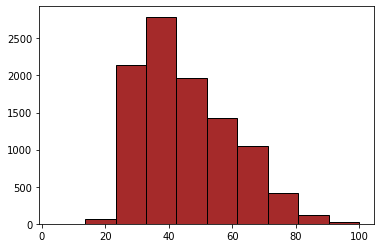

In [42]:
plt.hist(a['Age'],color = 'brown',edgecolor = 'black')
plt.show()

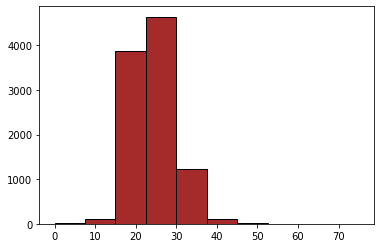

In [43]:
plt.hist(a['BMI'],color = 'brown',edgecolor = 'black')
plt.show()

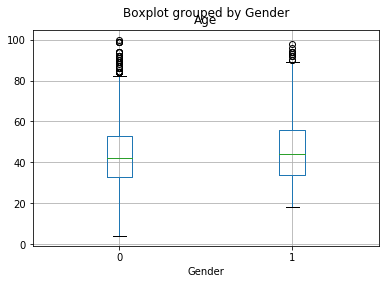

In [44]:
a.boxplot(column='Age',by='Gender') # mean age of male and female are close

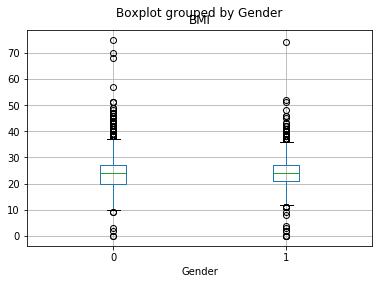

In [50]:
a.boxplot(column='BMI',by='Gender') # mean bmi of male and female are close

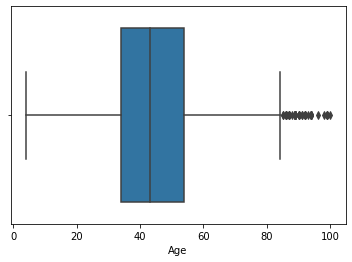

In [51]:
sns.boxplot(a['Age']) # median age is around 43

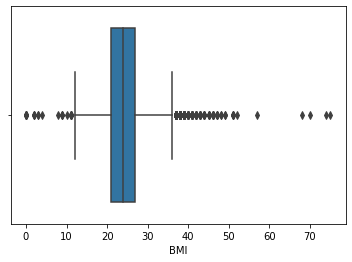

In [52]:
sns.boxplot(a['BMI']) # median is around 24 and has outliers

In [41]:
cm = sns.light_palette("green", as_cmap=True)

In [42]:
pd.crosstab(a['Medication_DB'], a['Is_diabetic']).style.background_gradient(cmap = cm)

Is_diabetic,0,1
Medication_DB,,
0,8544,82
1,0,1372


In [109]:
pd.crosstab(a['Medication_HTN'], a['is_hypertension'])

is_hypertension,0,1
Medication_HTN,,
0.0,7909,136
1.0,0,1953


In [110]:
pd.crosstab(a['Medication_Thyroid'], a['Medication_Thyroid'])

Medication_Thyroid,0.0,1.0
Medication_Thyroid,,
0.0,9982,0
1.0,0,16


In [57]:
pd.crosstab(a['Medication_Dyslipidemia'], a['Is_Dyslipidemia']).style.background_gradient(cmap = cm)

Is_Dyslipidemia,0,1
Medication_Dyslipidemia,,
0,9996,1
1,0,1


In [58]:
a.columns

Index(['Age', 'Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid', 'Is_Dyslipidemia',
       'BP_riskscore', 'DB_category', 'OB_category', 'Alcohol', 'BMI',
       'Gender', 'is_hypertension', 'Is_diabetic', 'DB_family',
       'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease',
       'Patient_ID'],
      dtype='object')

In [59]:
pd.crosstab(a['BP_riskscore'], a['Heart_attack']).style.background_gradient(cmap = cm) # BP risk score 0 has heartattack

Heart_attack,0,1
BP_riskscore,,
0,6519,91
1,1653,39
2,1665,31


In [60]:
a.columns

Index(['Age', 'Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid', 'Is_Dyslipidemia',
       'BP_riskscore', 'DB_category', 'OB_category', 'Alcohol', 'BMI',
       'Gender', 'is_hypertension', 'Is_diabetic', 'DB_family',
       'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease',
       'Patient_ID'],
      dtype='object')

In [111]:
pd.crosstab(a['is_hypertension'], a['Is_diabetic']).style.background_gradient(cmap = cm)

Is_diabetic,0,1
is_hypertension,,
0,7419,490
1,1125,964


In [112]:
pd.crosstab(a['is_hypertension'], a['Heart_attack']).style.background_gradient(cmap = cm)

Heart_attack,0,1
is_hypertension,,
0,7867,42
1,1970,119


In [529]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


#### Transformation #can be used for log reg

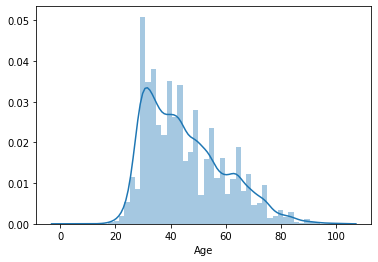

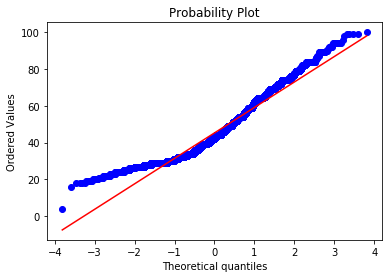

In [530]:
sns.distplot(a['Age'])
fig = plt.figure()
res = stats.probplot(a['Age'], plot=plt)

In [533]:
a['Age'] = np.log(a['Age']) # log transformation only for report


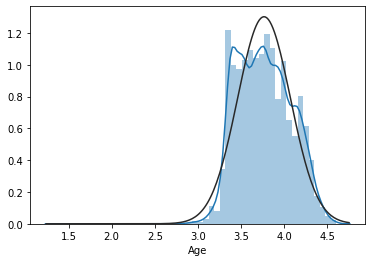

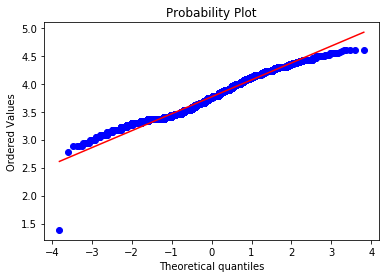

In [536]:
sns.distplot(a['Age'], fit=norm);
fig = plt.figure()
res = stats.probplot(a['Age'], plot=plt)

### Kmeans

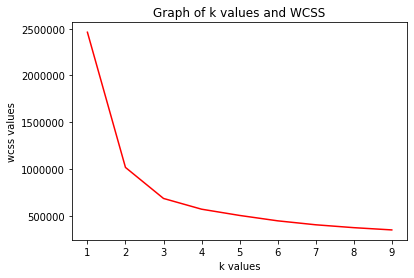

In [115]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(a)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

In [35]:
from sklearn.cluster import KMeans

In [36]:
a.head()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,39,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,13
1,34,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,13
2,74,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0
3,39,0,0,0,0,0,0,0,1,0,0,19,0,0,0,0,0,0,0,13
4,34,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,13


In [37]:
# elbow is formed, to get better idea silhoutte can be performed

In [38]:
import plusmodules as pm
#pm.svisualizer(RFMs, 3)

In [39]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(a)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [297]:
import plusmodules as pm
#pm.svisualizer(a, 3)

In [40]:
clusters = kmeans.fit_predict(a)

In [41]:
import sklearn

In [623]:
sklearn.metrics.silhouette_score(a,clusters) 

0.4271299915468123

In [42]:
a['cluster'] = kmeans.labels_

In [43]:
a.head()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,...,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,cluster
0,39,0,0,0,0,0,0,0,0,0,...,19,0,0,0,0,0,0,0,13,2
1,34,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,0,0,0,13,2
2,74,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,0,0,0,0,1
3,39,0,0,0,0,0,0,0,1,0,...,19,0,0,0,0,0,0,0,13,2
4,34,0,0,0,0,0,0,0,0,0,...,21,0,0,0,0,0,0,0,13,2


In [44]:
a['cluster'].value_counts()

2    4422
0    3549
1    2027
Name: cluster, dtype: int64

In [116]:
X = a.drop('cluster',axis = 1)
y = a['cluster']

KeyError: "['cluster'] not found in axis"

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xs = sc.fit_transform(X)

In [53]:

from sklearn.linear_model import LogisticRegression
l = LogisticRegression()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score = cross_val_score(l, Xs, y,cv=kfold, scoring='f1_weighted',n_jobs= -1)
print(np.mean(score),np.var(score,ddof=1))

0.9742144391640627 2.7947885978287183e-05


In [676]:

RF = RandomForestClassifier()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score = cross_val_score(RF, Xs, y,cv=kfold, scoring='f1_weighted',n_jobs= -1)
print(np.mean(score),np.var(score,ddof=1))

0.9919978432784763 7.900495922544435e-06


In [49]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.GLM(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.5):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Age', 'Medication_DB', 'Medication_HTN', 'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category', 'BMI', 'Gender', 'is_hypertension', 'Is_diabetic', 'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease']


In [50]:
#kmeans selected features = ['Age', 'Medication_DB', 'Medication_HTN', 'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category', 'BMI', 'Gender', 'is_hypertension', 'Is_diabetic', 'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease']

Index(['Age', 'Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid', 'Is_Dyslipidemia',
       'BP_riskscore', 'DB_category', 'OB_category', 'Alcohol', 'BMI',
       'Gender', 'is_hypertension', 'Is_diabetic', 'DB_family',
       'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease'],
      dtype='object')

In [51]:
X = a[['Age', 'Medication_DB', 'Medication_HTN', 'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category', 'BMI', 'Gender', 'is_hypertension', 'Is_diabetic', 'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease']]

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Xs,y,test_size=.30,random_state=0)

In [72]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [73]:

print('Logistic Regression:')
print(classification_report(y_test, y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       622
           1       0.99      0.91      0.95      1099
           2       0.95      1.00      0.97      1279

    accuracy                           0.96      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.96      0.96      3000



In [75]:
RF = DecisionTreeClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)

In [76]:

print('Decision Tree:')
print(classification_report(y_test, y_pred))

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       622
           1       1.00      0.99      0.99      1099
           2       0.99      1.00      1.00      1279

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [77]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [78]:

print('Random Forest:')
print(classification_report(y_test, y_pred))

Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       622
           1       0.98      0.99      0.98      1099
           2       1.00      0.98      0.99      1279

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



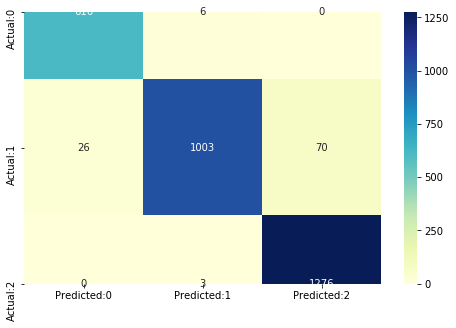

In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Kmodes - clustering screening dataset

In [60]:
pip install kmodes


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Hp\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [37]:
from kmodes.kmodes import KModes

In [ ]:
a.drop('Patient_ID',axis = 1,inplace = True)

In [55]:
a.drop('cluster',axis =1,inplace = True)

In [58]:
km = KModes(n_clusters = 3)

In [59]:
c = km.fit_predict(a)

In [60]:
print(km.cluster_centroids_)

[[29  0  0  0  0  0  0  0  0  2  0 23  0  0  0  0  0  0  0 13]
 [54  1  1  0  0  0  0  2  2  2  0 26  1  1  1  0  0  0  0  1]
 [39  0  0  0  0  0  0  1  0  1  0 24  1  0  0  1  1  0  0 11]]


In [635]:
import sklearn

In [636]:
sklearn.metrics.silhouette_score(a,c) # overlapping clusters

-0.08231465496329139

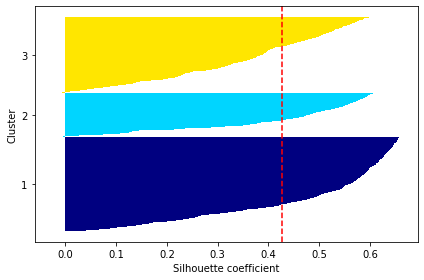

In [77]:
import plusmodules as pm
pm.svisualizer(a, 3)

In [61]:
a['cluster'] = km.labels_

In [62]:
a.head() # female coded as 0 and male as 1

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,...,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,cluster
0,39,0,0,0,0,0,0,0,0,0,...,19,0,0,0,0,0,0,0,13,0
1,34,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,0,0,0,13,0
2,74,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,0,0,0,0,0
3,39,0,0,0,0,0,0,0,1,0,...,19,0,0,0,0,0,0,0,13,0
4,34,0,0,0,0,0,0,0,0,0,...,21,0,0,0,0,0,0,0,13,0


In [63]:
a['cluster'].value_counts()

0    7165
1    1422
2    1411
Name: cluster, dtype: int64

In [64]:
X = a.drop('cluster',axis = 1)
y = a['cluster']

In [65]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xs = sc.fit_transform(X)



In [66]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score = cross_val_score(l, Xs, y,cv=kfold, scoring='f1_weighted',n_jobs= -1)
print(np.mean(score),np.var(score,ddof=1))

0.8996034685960531 2.7000924286711454e-05


In [67]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.GLM(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.5):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Age', 'Medication_HTN', 'Medication_Dyslipidemia', 'Is_thyroid', 'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category', 'BMI', 'Gender', 'Is_diabetic', 'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease']


In [643]:

RF = RandomForestClassifier()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score = cross_val_score(RF, Xs, y,cv=kfold, scoring='f1_weighted',n_jobs= -1)
print(np.mean(score),np.var(score,ddof=1))

0.9743452645981059 2.6904021413467585e-06


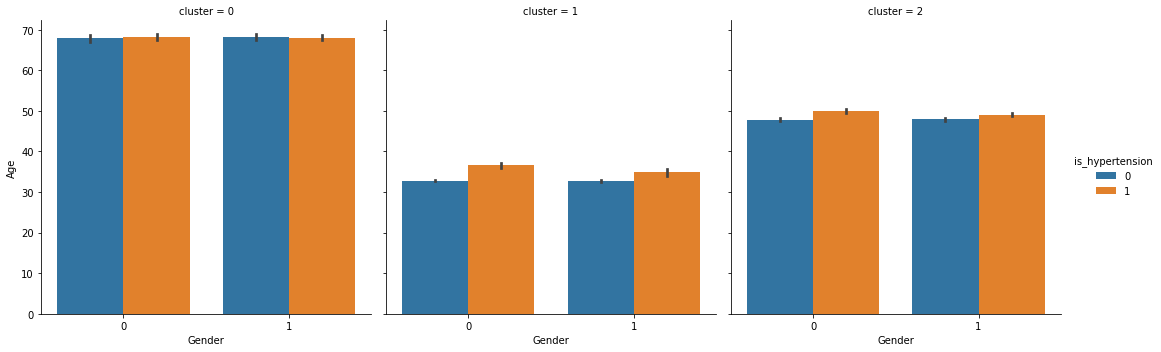

In [109]:
g = sns.catplot(x="Gender", y="Age", hue = 'is_hypertension', col="cluster",
               data=a, kind="bar")

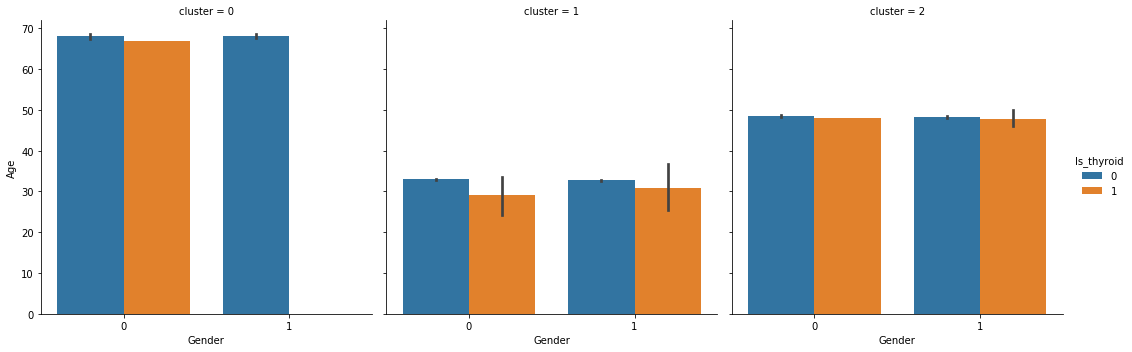

In [93]:
g = sns.catplot(x="Gender", y="Age", hue = 'Is_thyroid', col="cluster",
               data=a, kind="bar") 

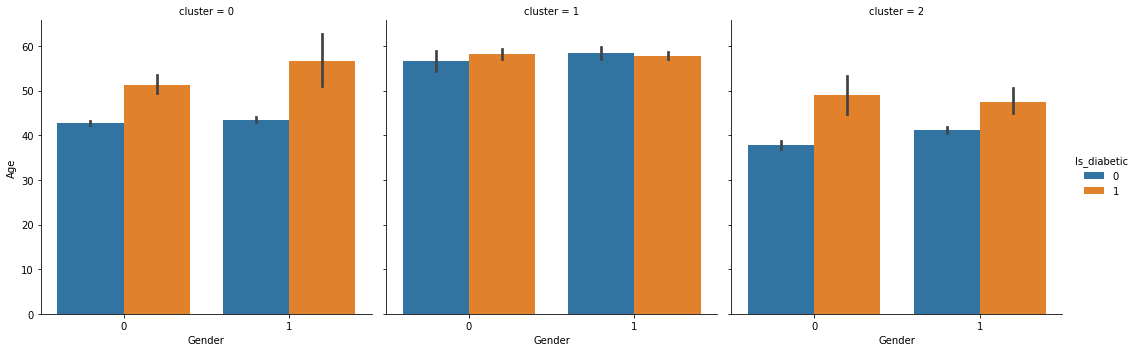

In [500]:
g = sns.catplot(x="Gender", y="Age", hue = 'Is_diabetic', col="cluster",
               data=a, kind="bar")

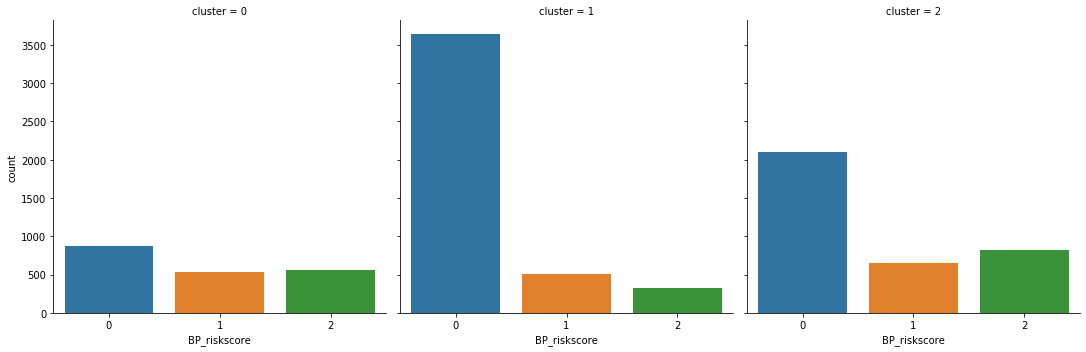

In [129]:
g = sns.catplot("BP_riskscore", col="cluster",
                data=a,
                kind="count")

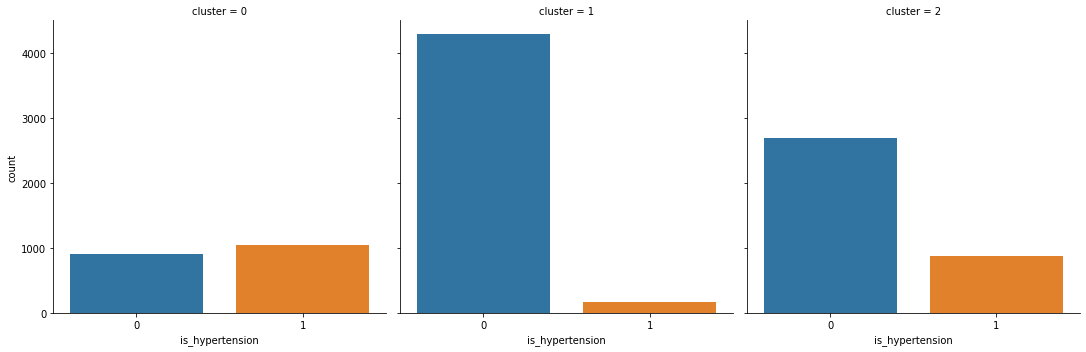

In [112]:
g = sns.catplot("is_hypertension", col="cluster",
                data=a,
                kind="count")

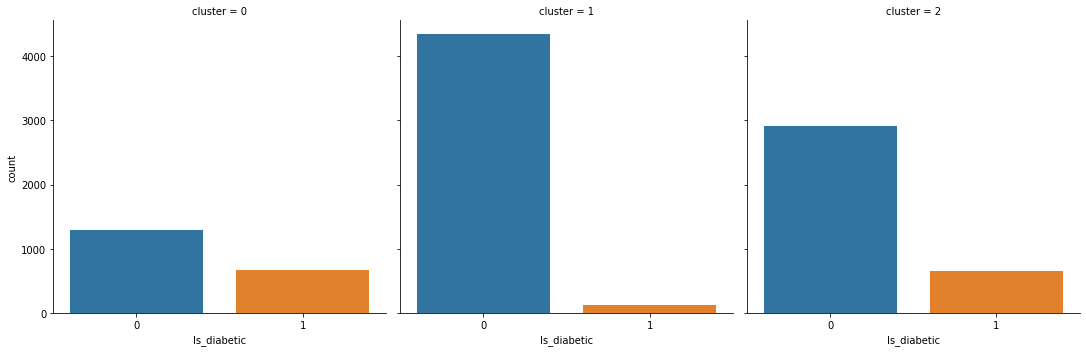

In [113]:
g = sns.catplot("Is_diabetic", col="cluster",
                data=a,
                kind="count")

In [218]:
a[a['cluster'] == 0][['Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid',
       'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category',
       'Alcohol', 'Gender', 'is_hypertension', 'Is_diabetic',
       'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking',
       'Disease']].mode()

,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,1


In [219]:
a[a['cluster'] == 0][['Age','BMI']].median()
# This is a cluster of female who can be considered as healthy because this cluster has no disease expect for high risk of obesity.

Age    66.0
BMI    24.0
dtype: float64

In [220]:
a[a['cluster'] == 1][['Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid',
       'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category',
       'Alcohol', 'Gender', 'is_hypertension', 'Is_diabetic',
       'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking',
       'Disease']].mode()

,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,1


In [221]:
a[a['cluster'] == 1][['Age','BMI']].median()
# THis cluster consist of male who take medication for diabetics, hypertension, BP_riskscore is high and high risk for obesity. Age is around 55 and bmi is 26. THey can be considered as having high risk to cvd

Age    48.0
BMI    25.0
dtype: float64

In [222]:
a[a['cluster'] == 2][['Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid',
       'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category',
       'Alcohol', 'Gender', 'is_hypertension', 'Is_diabetic',
       'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking',
       'Disease']].mode()

,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [223]:
a[a['cluster'] == 2][['Age','BMI']].median() 
# This is a cluster of male with a medium risk of obesity.
#This category can be considered as medium risk

Age    32.0
BMI    22.0
dtype: float64

### Kprototype

In [207]:
from kmodes.kprototypes import KPrototypes

In [118]:
a.drop('cluster',axis = 1,inplace = True)

KeyError: "['cluster'] not found in axis"

In [135]:
cost = [] # not yet included in report
for num_clusters in list(range(1,10)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42,n_jobs=-2,max_iter=15,n_init=50) 
    kproto.fit_predict(ak, categorical=[1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19])
    cost.append(kproto.cost_)

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

KeyboardInterrupt: 

In [39]:
a.head()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,39,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,13
1,34,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,13
2,74,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0
3,39,0,0,0,0,0,0,0,1,0,0,19,0,0,0,0,0,0,0,13
4,34,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,13


In [155]:
a.shape

(9998, 20)

In [208]:
ak = a.values


In [209]:
kp = KPrototypes(n_clusters = 3,max_iter =20, random_state = 0)

In [210]:
clusters = kp.fit_predict(ak,categorical = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19])

In [211]:
import sklearn

In [212]:
sklearn.metrics.silhouette_score(a,clusters) 

0.425662414820428

In [213]:
l = []
for c in clusters:
    l.append(c)

In [214]:
a['cluster'] = l

In [215]:
a['cluster'].value_counts()

2    4346
1    3605
0    2047
Name: cluster, dtype: int64

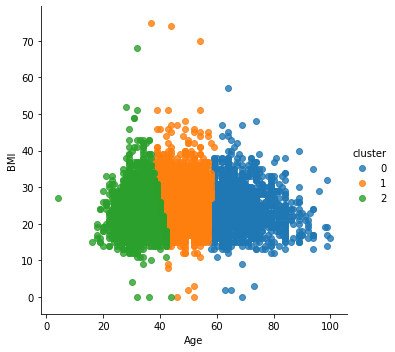

In [216]:
sns.lmplot(x = 'Age', y = 'BMI', data = a, hue = 'cluster', fit_reg = False )

In [217]:
X = a.drop('cluster',axis = 1)
y = a['cluster']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xs = sc.fit_transform(X)


In [130]:
a.columns

Index(['Age', 'Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid', 'Is_Dyslipidemia',
       'BP_riskscore', 'DB_category', 'OB_category', 'Alcohol', 'BMI',
       'Gender', 'is_hypertension', 'Is_diabetic', 'DB_family',
       'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease', 'cluster'],
      dtype='object')

In [131]:
ct=pd.crosstab(a['Medication_Dyslipidemia'],a['cluster'])
print(ct)

cluster                     0     1     2
Medication_Dyslipidemia                  
0.0                      3585  4371  2041
1.0                         0     0     1


### Stat test

In [60]:
from scipy.stats import shapiro,mannwhitneyu,bartlett,chi2_contingency

In [242]:
chi2_contingency(ct)

(3.8846093495855296,
 0.14337314025763578,
 2,
 array([[2.04679526e+03, 3.60463943e+03, 4.34556531e+03],
        [2.04740948e-01, 3.60572114e-01, 4.34686937e-01]]))

In [50]:
ct=pd.crosstab(a['Medication_DB'],a['Medication_HTN'])
print(ct)

Medication_HTN     0     1
Medication_DB             
0               7603  1023
1                442   930


In [51]:
chi2_contingency(ct)

(2351.800119455829, 0.0, 1, array([[6941.00520104, 1684.99479896],
        [1103.99479896,  268.00520104]]))

In [52]:
Z_crit=st.chi2.isf(0.05,1)
Z_crit

3.8414588206941285

In [ ]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('BMI ~ cluster', data = a).fit()
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

### PCA

In [115]:
from sklearn.decomposition import PCA 

pca = PCA()
X_pca = pca.fit_transform(Xs)

In [165]:
from mpl_toolkits.mplot3d import Axes3D

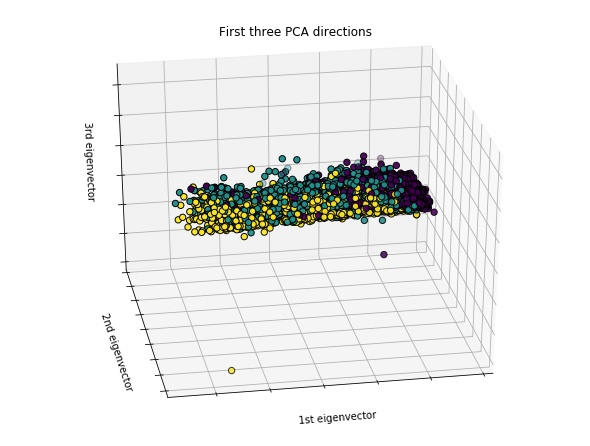

In [168]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=100)
X_reduced = PCA(n_components=7).fit_transform(Xs) #210 x7
ax.scatter(X_reduced[:,0], X_reduced[:, 1],X_reduced[:,2], c=a['cluster'],
            edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [116]:
pca.explained_variance_ratio_

array([0.22196013, 0.09793296, 0.09280594, 0.08577778, 0.0749199 ,
       0.06845386, 0.06101794, 0.04892768, 0.04717491, 0.04065405,
       0.03549847, 0.0308693 , 0.02653469, 0.02006291, 0.01487266,
       0.01452732, 0.01146485, 0.00289232, 0.00236042, 0.0012919 ])

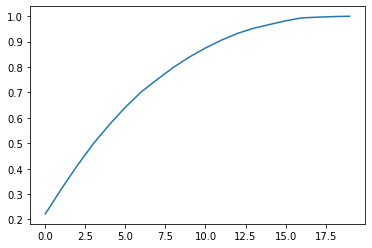

In [104]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [159]:
pca = PCA(n_components = 3, whiten=True)
X_pca = pca.fit_transform(Xs)

In [160]:
principalDf = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [161]:
finalDf = pd.concat([principalDf, a[['cluster']]], axis = 1)

In [162]:
finalDf

,principal component 1,principal component 2,principal component 3,cluster
0,-0.840625,-0.381582,0.888818,0
1,-0.899690,-0.389528,0.914978,0
2,-0.090441,-0.618893,1.315341,2
3,-0.642149,-0.386717,0.929290,0
4,-0.857710,-0.316073,0.717739,0
...,...,...,...,...
9993,-0.010334,-0.051714,-0.146681,2
9994,0.899412,-0.229814,0.598769,2
9995,2.484265,0.081622,-0.114305,2
9996,0.626556,0.512278,-1.435545,1


In [51]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score = cross_val_score(l, Xs, y,cv=kfold, scoring='f1_weighted',n_jobs= -1) 
print(np.mean(score),np.var(score,ddof=1))
print(1-np.mean(score))

0.9736064662718494 2.58979039040768e-05
0.026393533728150564


In [52]:

RF = DecisionTreeClassifier()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score = cross_val_score(RF, Xs, y,cv=kfold, scoring='f1_weighted',n_jobs= -1)
print(np.mean(score),np.var(score,ddof=1))
(1-np.mean(score))

0.994898270783134 2.1739737912499643e-06


0.005101729216866024

In [54]:

RF = RandomForestClassifier()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score = cross_val_score(RF, Xs, y,cv=kfold, scoring='f1_weighted',n_jobs= -1)
print(np.mean(score),np.var(score,ddof=1))
(1-np.mean(score))

NameError: name 'RandomForestClassifier' is not defined

### Feature selection for kprototype

In [132]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.GLM(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.5):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Age', 'Medication_DB', 'Medication_HTN', 'Medication_Thyroid', 'Is_thyroid', 'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category', 'BMI', 'Gender', 'Is_diabetic', 'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease']


In [133]:
X.columns

Index(['Age', 'Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid', 'Is_Dyslipidemia',
       'BP_riskscore', 'DB_category', 'OB_category', 'Alcohol', 'BMI',
       'Gender', 'is_hypertension', 'Is_diabetic', 'DB_family',
       'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease'],
      dtype='object')

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xs = sc.fit_transform(X)

NameError: name 'X' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score = cross_val_score(l, Xs, y,cv=kfold, scoring='f1_weighted',n_jobs= -1)
print(np.mean(score),np.var(score,ddof=1))

In [136]:

RF = RandomForestClassifier()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score = cross_val_score(RF, Xs, y,cv=kfold, scoring='f1_weighted',n_jobs= -1)
print(np.mean(score),np.var(score,ddof=1))

NameError: name 'RandomForestClassifier' is not defined

In [53]:
a[a['cluster'] == 0][['Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid',
       'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category',
       'Alcohol', 'Gender', 'is_hypertension', 'Is_diabetic',
       'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking',
       'Disease']].mode()

,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1,0,0,0,0,0,0,1


In [54]:
c0 = a[a['cluster']==0]

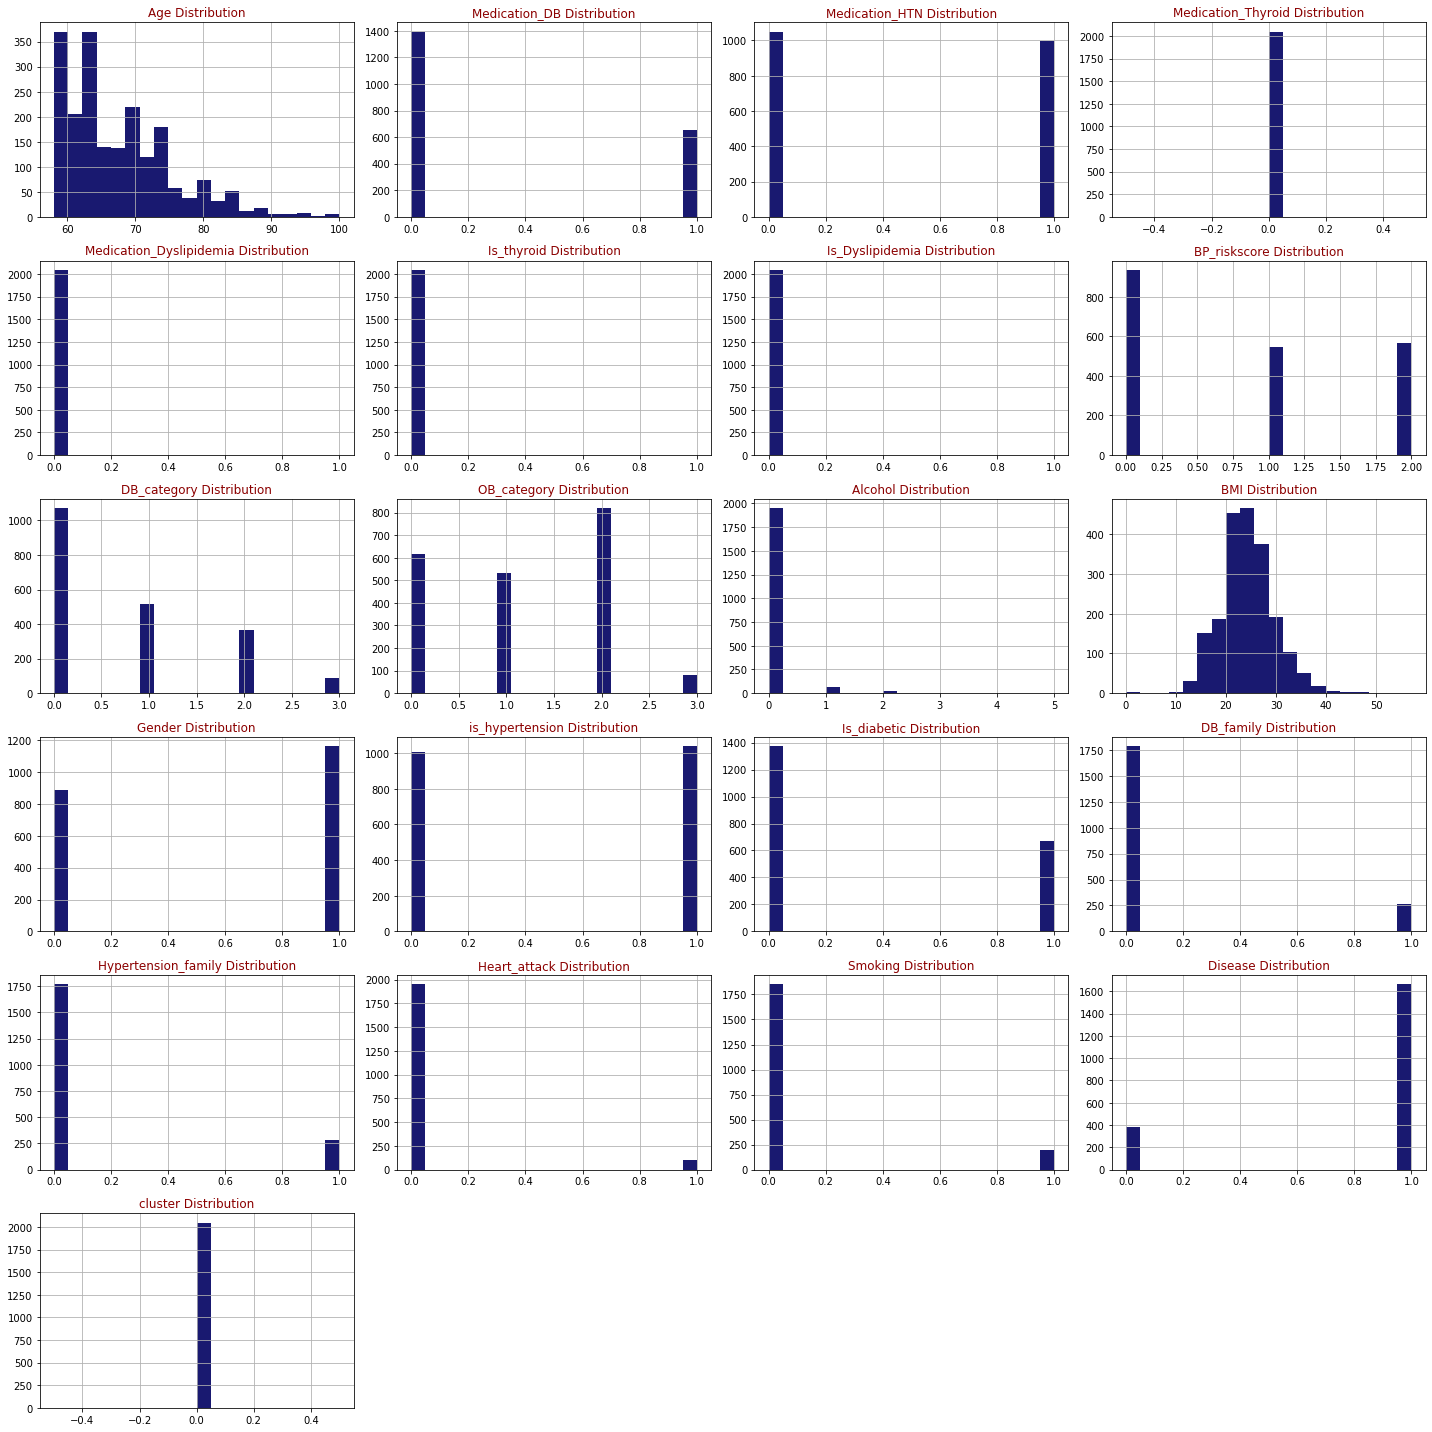

In [246]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(c0,c0.columns,6,4)

In [55]:
a[a['cluster'] == 1][['Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid',
       'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category',
       'Alcohol', 'Gender', 'is_hypertension', 'Is_diabetic',
       'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking',
       'Disease']].mode()

,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In [251]:
c1 = a[a['cluster']==1]

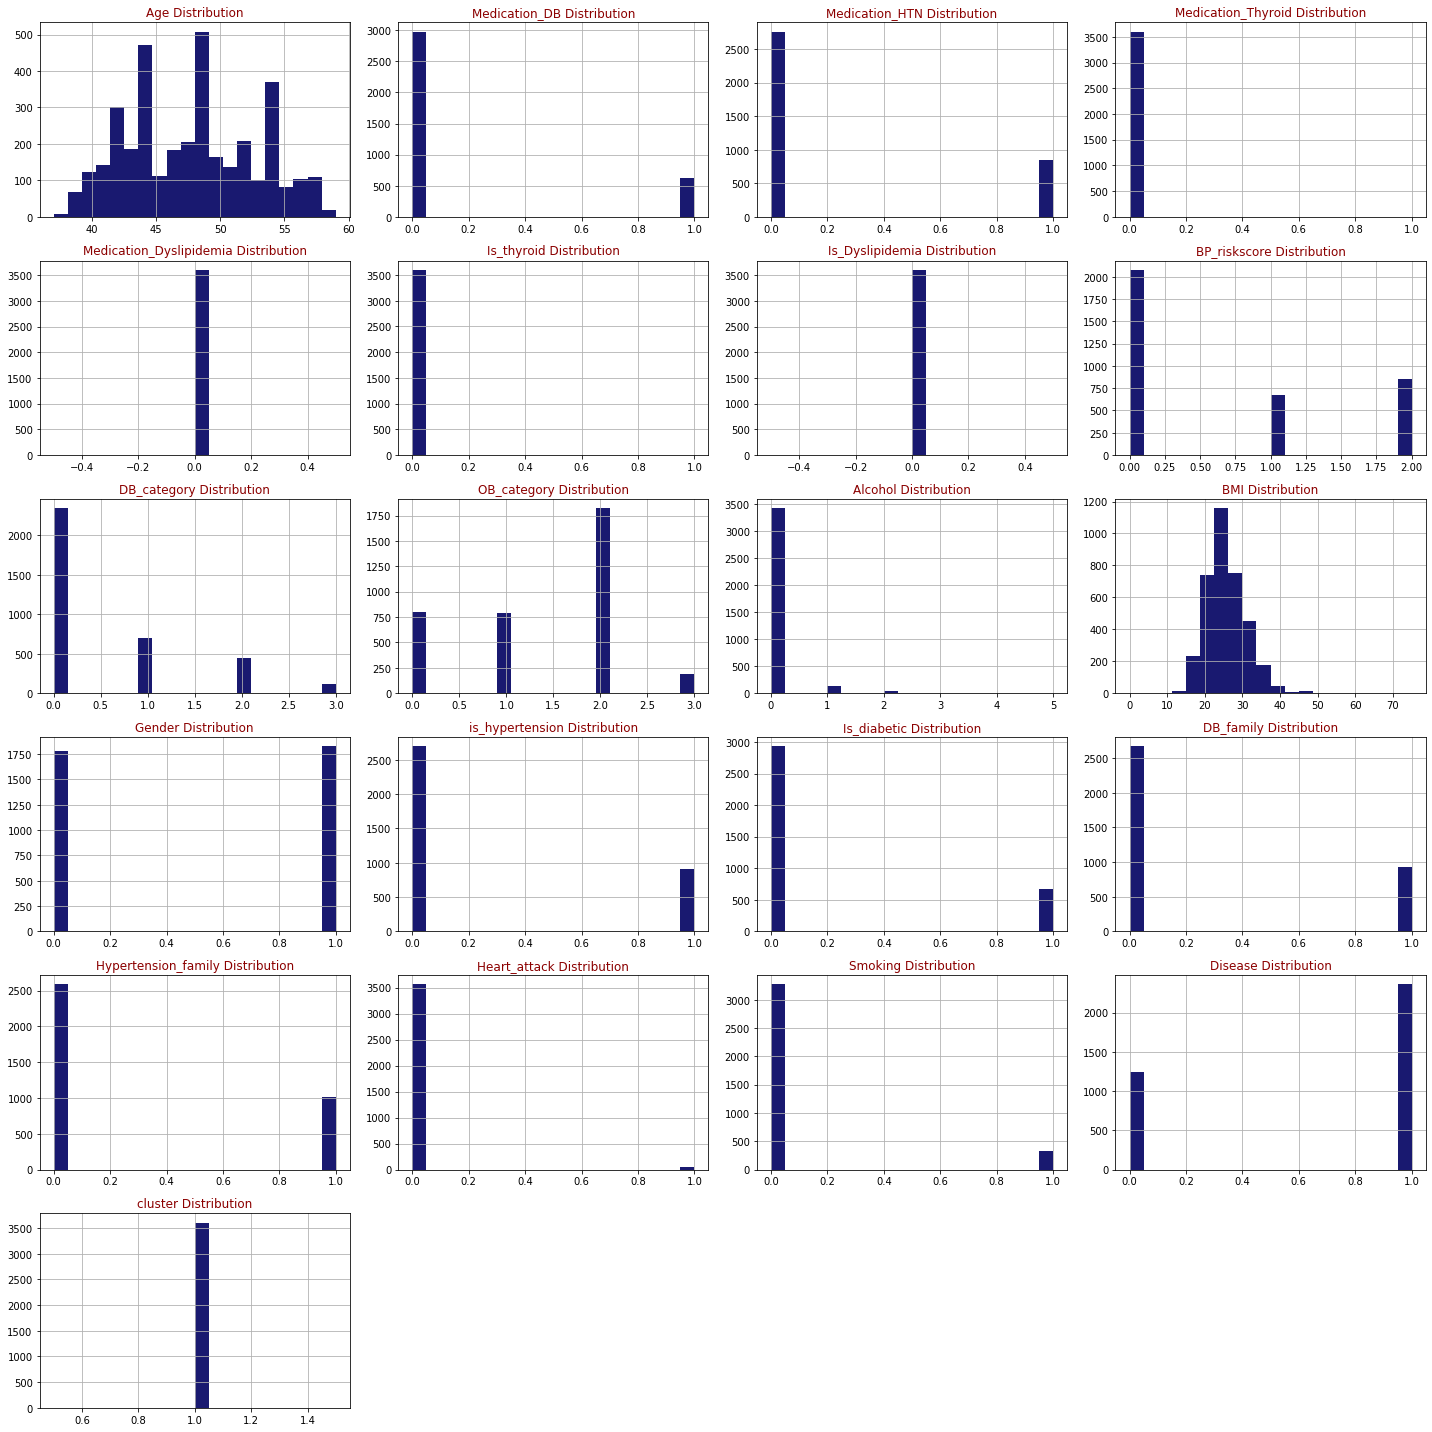

In [252]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(c1,c1.columns,6,4)

In [56]:
a[a['cluster'] == 2][['Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid',
       'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category',
       'Alcohol', 'Gender', 'is_hypertension', 'Is_diabetic',
       'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking',
       'Disease']].mode()

,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1,1,0,0,0,0,0,1


In [254]:
c2 = a[a['cluster']==2]

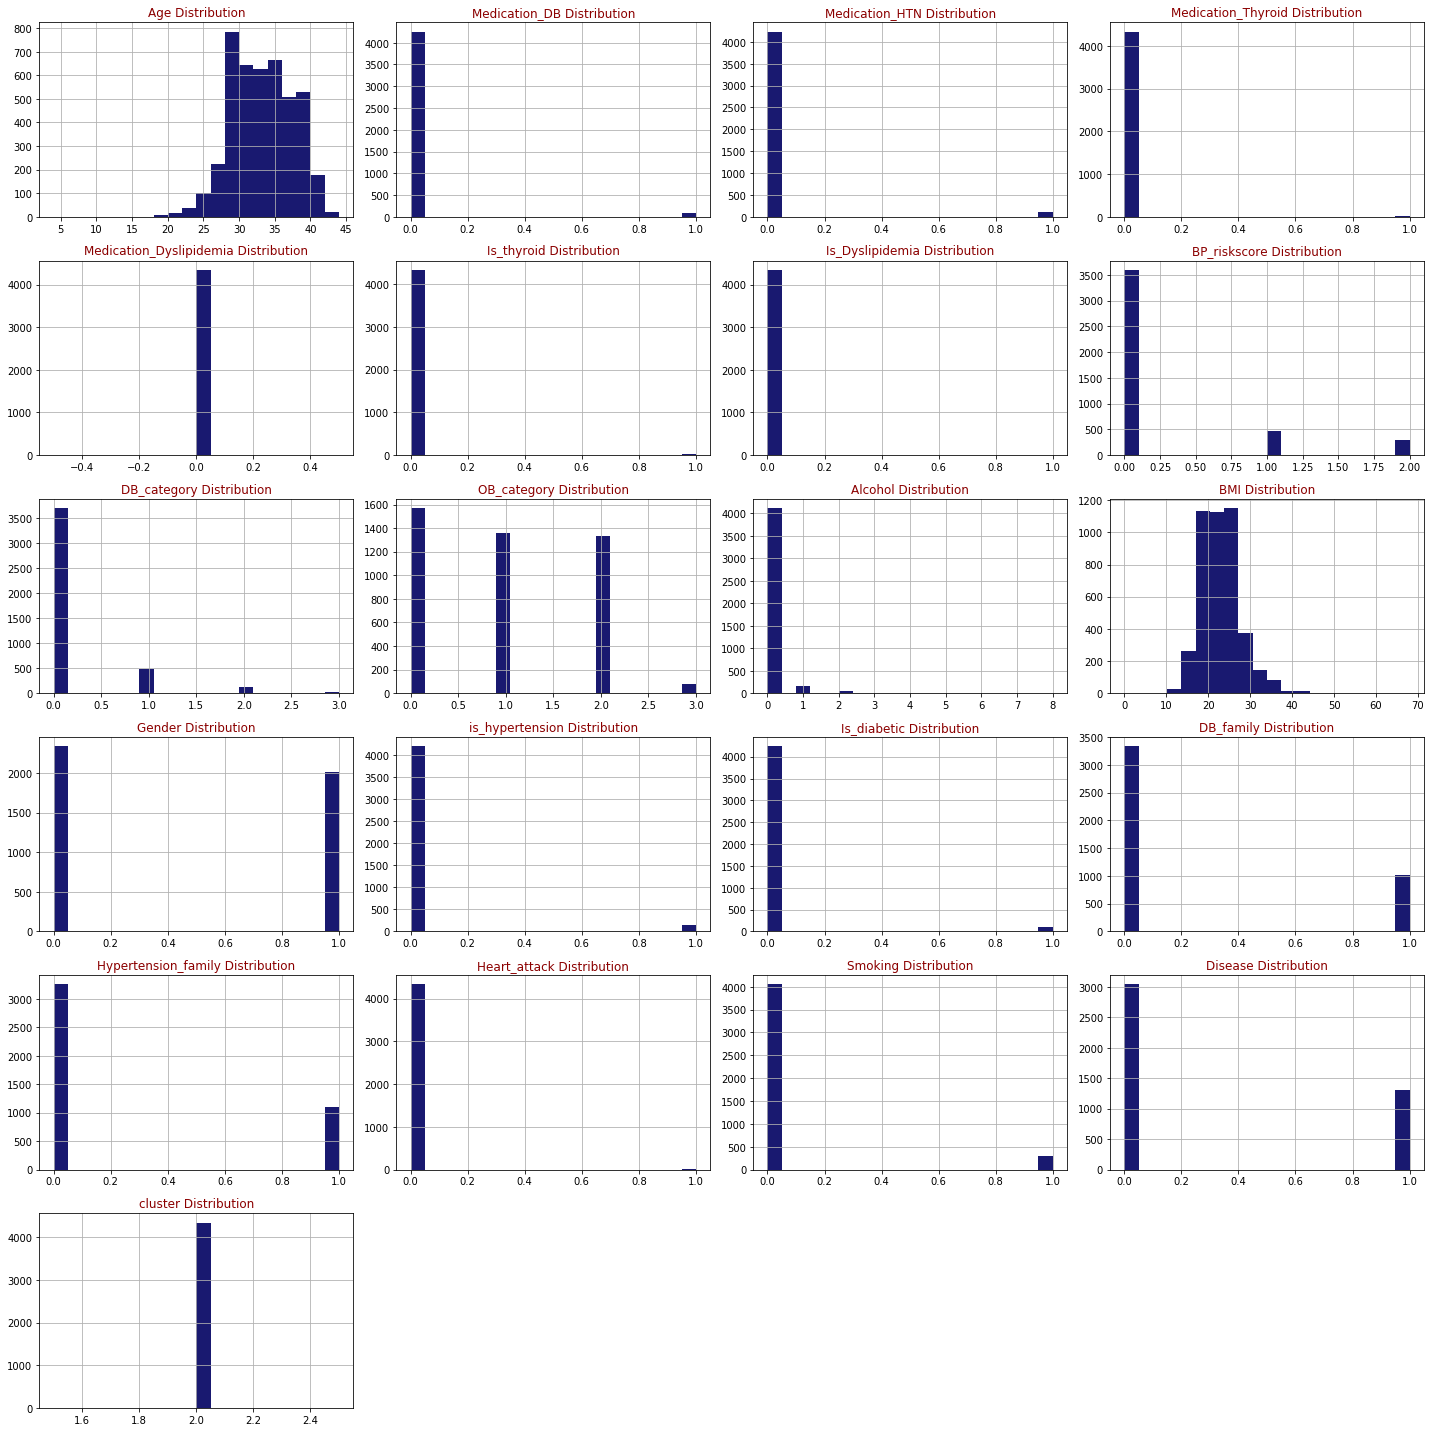

In [255]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(c2,c2.columns,6,4)

In [256]:
a[a['cluster'] == 2][['Age','BMI']].mean()

Age    32.703636
BMI    22.857800
dtype: float64

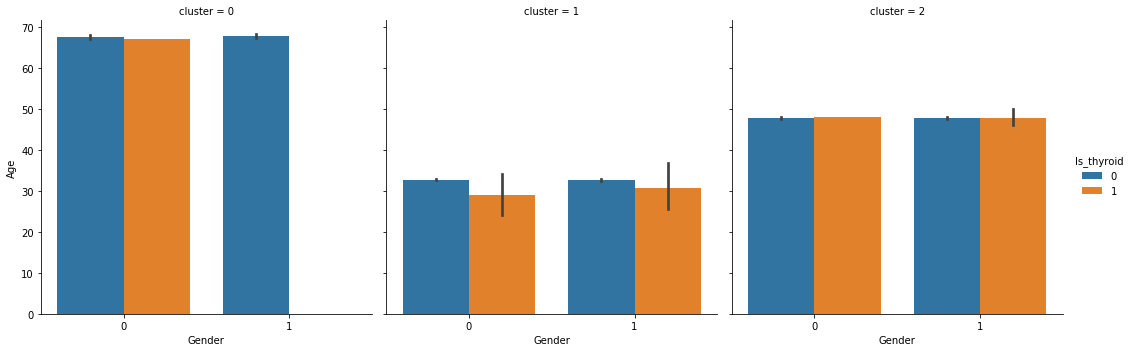

In [406]:
g = sns.catplot(x="Gender", y="Age", hue = 'Is_thyroid', col="cluster",
               data=a, kind="bar") 

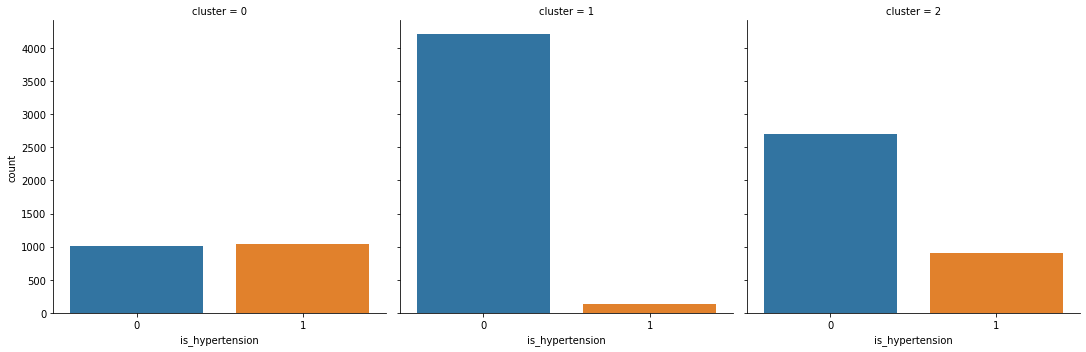

In [407]:
g = sns.catplot("is_hypertension", col="cluster",
                data=a,
                kind="count")

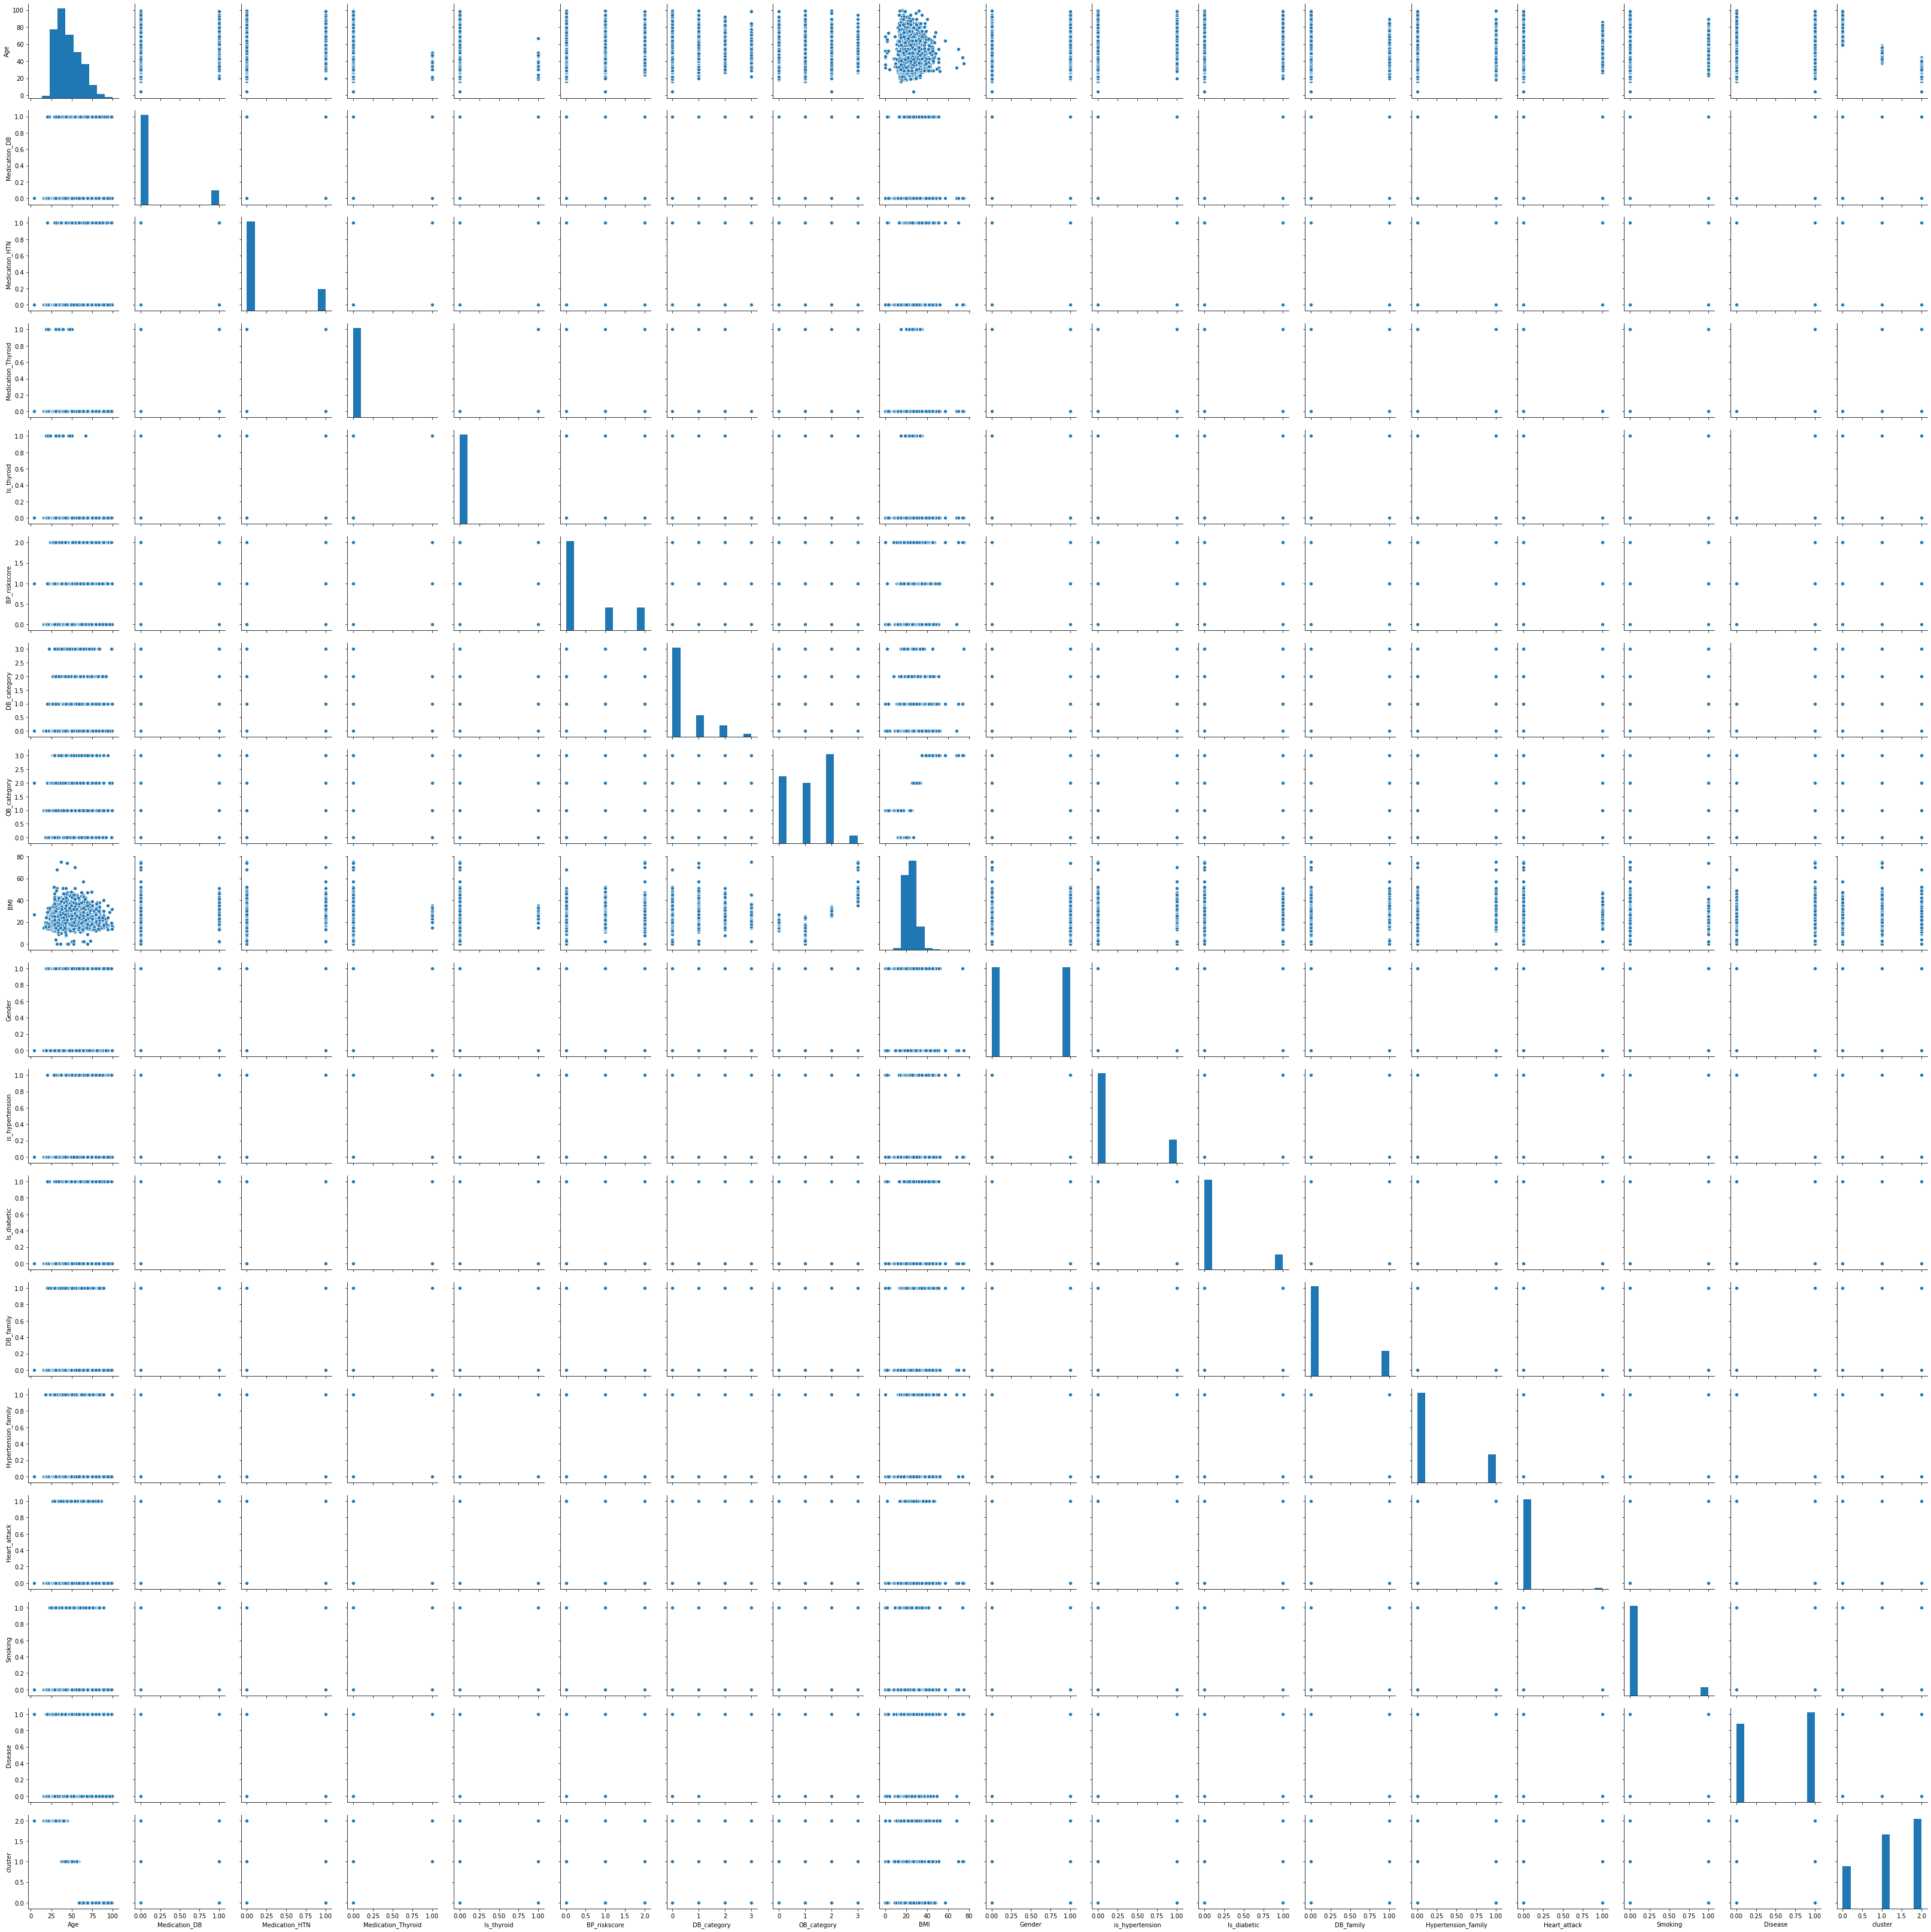

In [259]:
sns.pairplot(a) # pairplot after removing is_dys, medication_dys and alcohol

### Inference

In [ ]:
kmeans logreg 0.974, random 0.99 , sil = 0.42

In [ ]:
kmodes logreg 0.92, random = 0.97, sil = -0.08

In [ ]:
kproto logreg 0.976 random = 0.99,sil = 0.42

In [141]:
a.head()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,...,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,cluster
0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.25,0,0,0,0,0,0,0,0,1
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.86,0,0,0,0,0,0,0,0,1
2,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.83,0,0,0,0,0,0,0,1,2
3,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,19.91,0,0,0,0,0,0,0,0,1
4,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.57,0,0,0,0,0,0,0,0,1


In [58]:
a['Patient_ID'] = b

In [59]:
a.head()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,...,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,cluster,Patient_ID
0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,12-1101
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,12-1102
2,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,2,12-1103
3,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,12-1105
4,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,12-1106


In [60]:
a['Patient_ID']

0                  12-1101
1                  12-1102
2                  12-1103
3                  12-1105
4                  12-1106
               ...        
9995    NHIN30091600026024
9996    NHIN30091600026025
9997    NHIN30091600026026
9998    NHIN30091600030006
9999    NHIN30091600030007
Name: Patient_ID, Length: 9998, dtype: object

### Follow up

In [57]:
fu = pd.read_excel("E:Followups.xlsx")

In [66]:
c= pd.DataFrame(fu['Patient_ID'].value_counts().index.tolist())

In [67]:
c['counts'] = pd.DataFrame(fu['Patient_ID'].value_counts().values)

In [68]:
c.head()

,0,counts
0,NHIN24091600015014,36
1,NHIN14021700015003,35
2,NHIN29081600047019,34
3,NHIN05021700015001,32
4,D2D-38955,32


In [69]:
c['Patient_ID'] = c[0]

In [61]:
f = fu.groupby('Patient_ID',as_index=False,sort=False).last()
print(f)

             Patient_ID DiagnosisDate  Age  Weight   Hip  Waist    BMI  \
0               30-2956    2019-11-15   59    62.3  37.0     39  25.10   
1             D2D-21303    2016-08-14   89    68.0   NaN     38  45.75   
2             D2D-21324    2016-03-01   54    57.0   NaN     35  20.91   
3             D2D-21346    2015-12-13   54    47.0   NaN     34    NaN   
4             D2D-21391    2016-08-14   69    57.0   NaN     36  29.26   
..                  ...           ...  ...     ...   ...    ...    ...   
775  NHIN29111600001011    2017-02-11   54    49.8  30.0     32  18.27   
776  NHIN30081600046001    2017-04-19   67    56.2  38.0     35  22.66   
777  NHIN30081900070001    2019-11-01   43    60.0  35.0     34  22.00   
778  NHIN30081900070002    2019-10-11   55    50.9  33.0     34  21.20   
779  NHIN30091600026001    2017-05-13   79    87.0  44.0     35  32.92   

     Systolic_left  Diastolic_Left  Systolic_Right  Diastolic_Right  \
0              134              87      

In [62]:
f.head()

,Patient_ID,DiagnosisDate,Age,Weight,Hip,Waist,BMI,Systolic_left,Diastolic_Left,Systolic_Right,Diastolic_Right,Blood_Sugar_Category,Blood_Sugar
0,30-2956,2019-11-15,59,62.3,37.0,39,25.10,134,87,141.0,91.0,Random,69.0
1,D2D-21303,2016-08-14,89,68.0,NaN,38,45.75,122,82,NaN,NaN,Fasting,131.0
2,D2D-21324,2016-03-01,54,57.0,NaN,35,20.91,119,85,NaN,NaN,Fasting,226.0
3,D2D-21346,2015-12-13,54,47.0,NaN,34,NaN,141,101,NaN,NaN,Random,110.0
4,D2D-21391,2016-08-14,69,57.0,NaN,36,29.26,130,77,NaN,NaN,Fasting,94.0


In [63]:
f.shape

(780, 13)

In [74]:
ff= pd.merge(f,c,on='Patient_ID')

In [75]:
ff.head()

,Patient_ID,DiagnosisDate,Age,Weight,Hip,Waist,BMI,Systolic_left,Diastolic_Left,Systolic_Right,Diastolic_Right,Blood_Sugar_Category,Blood_Sugar,0,counts
0,30-2956,2019-11-15,59,62.3,37.0,39,25.10,134,87,141.0,91.0,Random,69.0,30-2956,8
1,D2D-21303,2016-08-14,89,68.0,NaN,38,45.75,122,82,NaN,NaN,Fasting,131.0,D2D-21303,6
2,D2D-21324,2016-03-01,54,57.0,NaN,35,20.91,119,85,NaN,NaN,Fasting,226.0,D2D-21324,1
3,D2D-21346,2015-12-13,54,47.0,NaN,34,NaN,141,101,NaN,NaN,Random,110.0,D2D-21346,1
4,D2D-21391,2016-08-14,69,57.0,NaN,36,29.26,130,77,NaN,NaN,Fasting,94.0,D2D-21391,7


In [192]:
ff['counts'].value_counts()

1     134
2     109
3     104
4      92
5      64
6      52
7      35
8      32
9      26
10     24
12     17
13     17
11     10
14      7
19      6
16      6
15      6
22      5
18      5
17      4
23      4
32      4
20      2
21      2
24      2
25      2
28      2
29      2
35      1
26      1
31      1
34      1
36      1
Name: counts, dtype: int64

In [143]:
m = pd.merge(a,ff,on='Patient_ID')

In [144]:
m.shape

(780, 36)

In [145]:
m.columns

Index([                  'Age_x',           'Medication_DB',
                'Medication_HTN',      'Medication_Thyroid',
       'Medication_Dyslipidemia',              'Is_thyroid',
               'Is_Dyslipidemia',            'BP_riskscore',
                   'DB_category',             'OB_category',
                       'Alcohol',                   'BMI_x',
                        'Gender',         'is_hypertension',
                   'Is_diabetic',               'DB_family',
           'Hypertension_family',            'Heart_attack',
                       'Smoking',                 'Disease',
                       'cluster',              'Patient_ID',
                 'DiagnosisDate',                   'Age_y',
                        'Weight',                     'Hip',
                         'Waist',                   'BMI_y',
                 'Systolic_left',          'Diastolic_Left',
                'Systolic_Right',         'Diastolic_Right',
          'Blood_Sugar_C

In [146]:
m.drop(0,axis = 1,inplace = True)

In [147]:
m.drop('Age_y',axis = 1,inplace = True)
m.drop('BMI_y',axis = 1,inplace = True)

In [148]:
m.drop('DiagnosisDate',axis = 1,inplace = True)

In [149]:
m.drop('Patient_ID',axis = 1,inplace = True)

In [150]:
m.isnull().sum()

Age_x                        0
Medication_DB                0
Medication_HTN               0
Medication_Thyroid           0
Medication_Dyslipidemia      0
Is_thyroid                   0
Is_Dyslipidemia              0
BP_riskscore                 0
DB_category                  0
OB_category                  0
Alcohol                      0
BMI_x                        0
Gender                       0
is_hypertension              0
Is_diabetic                  0
DB_family                    0
Hypertension_family          0
Heart_attack                 0
Smoking                      0
Disease                      0
cluster                      0
Weight                       0
Hip                         94
Waist                        0
Systolic_left                0
Diastolic_Left               0
Systolic_Right             542
Diastolic_Right            542
Blood_Sugar_Category         3
Blood_Sugar                 51
counts                       0
dtype: int64

In [151]:
m['Hip'].fillna(m['Hip'].median(),inplace=True)
m['Systolic_Right'].fillna(m['Systolic_Right'].median(),inplace=True)
m['Diastolic_Right'].fillna(m['Diastolic_Right'].median(),inplace=True)
m['Blood_Sugar'].fillna(m['Blood_Sugar'].median(),inplace=True)

In [152]:
m[m['cluster'] == 0][['Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid',
       'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category',
       'Alcohol', 'Gender', 'is_hypertension', 'Is_diabetic',
       'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking',
       'Disease']].mode()

,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1,0,0,0,0,0,0,1


In [153]:
m['cluster'].value_counts()

1    366
0    259
2    155
Name: cluster, dtype: int64

In [154]:
m[m['cluster'] == 1][['Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid',
       'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category',
       'Alcohol', 'Gender', 'is_hypertension', 'Is_diabetic',
       'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking',
       'Disease']].mode()

,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1,0,0,0,0,0,0,1


In [155]:
m[m['cluster'] == 2][['Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid',
       'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category',
       'Alcohol', 'Gender', 'is_hypertension', 'Is_diabetic',
       'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking',
       'Disease']].mode()

,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0,1,1,1,0,0,0,0,1


In [93]:
m['Age_x'].median()

41.0

In [102]:
m.head()

,Age_x,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,...,Weight,Hip,Waist,Systolic_left,Diastolic_Left,Systolic_Right,Diastolic_Right,Blood_Sugar_Category,Blood_Sugar,counts
0,89,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,...,68.0,38.0,38,122,82,138.0,91.0,2.0,131.0,6
1,54,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,47.0,38.0,34,141,101,138.0,91.0,1.0,110.0,1
2,69,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,...,57.0,38.0,36,130,77,138.0,91.0,2.0,94.0,7
3,79,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,...,62.0,38.0,36,124,84,138.0,91.0,2.0,119.0,6
4,40,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,...,71.0,38.0,39,134,94,138.0,91.0,2.0,159.0,1


In [158]:
m['Blood_Sugar_Category'].value_counts()

2.0    455
1.0    320
0.0      2
Name: Blood_Sugar_Category, dtype: int64

In [156]:
m['Blood_Sugar_Category'].replace({'Postprandial':0,'Random':1,'Fasting':2},inplace = True)

In [159]:
m['Blood_Sugar_Category']=m['Blood_Sugar_Category'].fillna(m['Blood_Sugar_Category'].mode()[0])

In [160]:
m.isnull().sum()

Age_x                      0
Medication_DB              0
Medication_HTN             0
Medication_Thyroid         0
Medication_Dyslipidemia    0
Is_thyroid                 0
Is_Dyslipidemia            0
BP_riskscore               0
DB_category                0
OB_category                0
Alcohol                    0
BMI_x                      0
Gender                     0
is_hypertension            0
Is_diabetic                0
DB_family                  0
Hypertension_family        0
Heart_attack               0
Smoking                    0
Disease                    0
cluster                    0
Weight                     0
Hip                        0
Waist                      0
Systolic_left              0
Diastolic_Left             0
Systolic_Right             0
Diastolic_Right            0
Blood_Sugar_Category       0
Blood_Sugar                0
counts                     0
dtype: int64

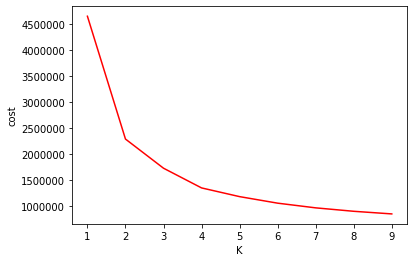

In [219]:
cost = [] # not yet included in report
for num_clusters in list(range(1,10)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42,n_jobs=-2,max_iter=15,n_init=50) 
    kproto.fit_predict(mk, categorical=[1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,28])
    cost.append(kproto.cost_)

plt.plot(range(1,10), cost, color='red')
plt.xlabel('K')
plt.ylabel('cost')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(a)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

In [162]:
mk = m.values


In [163]:
kp = KPrototypes(n_clusters = 2,max_iter =20, random_state = 0)


In [164]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 780 entries, 0 to 779
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age_x                    780 non-null    int64  
 1   Medication_DB            780 non-null    float64
 2   Medication_HTN           780 non-null    float64
 3   Medication_Thyroid       780 non-null    float64
 4   Medication_Dyslipidemia  780 non-null    float64
 5   Is_thyroid               780 non-null    float64
 6   Is_Dyslipidemia          780 non-null    float64
 7   BP_riskscore             780 non-null    float64
 8   DB_category              780 non-null    float64
 9   OB_category              780 non-null    float64
 10  Alcohol                  780 non-null    int64  
 11  BMI_x                    780 non-null    float64
 12  Gender                   780 non-null    int32  
 13  is_hypertension          780 non-null    int32  
 14  Is_diabetic              7

In [165]:

clusters = kp.fit_predict(mk,categorical = [1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,28])

In [166]:
import sklearn

In [167]:
sklearn.metrics.silhouette_score(mk,clusters) 

0.5862430981515194

In [168]:
l = []
for c in clusters:
    l.append(c)

In [169]:
m['out'] = l

In [170]:
m['out'].value_counts()

0    661
1    119
Name: out, dtype: int64

In [171]:
X = m.drop('out',axis = 1)
y = m['out']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xs = sc.fit_transform(X)

In [172]:
from sklearn.linear_model import LogisticRegression
l = LogisticRegression()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score = cross_val_score(l, Xs, y,cv=kfold, scoring='roc_auc',n_jobs= -1)
print(np.mean(score),np.var(score,ddof=1))

0.9979477655144905 2.949047248146462e-06


In [173]:
m.columns

Index(['Age_x', 'Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid', 'Is_Dyslipidemia',
       'BP_riskscore', 'DB_category', 'OB_category', 'Alcohol', 'BMI_x',
       'Gender', 'is_hypertension', 'Is_diabetic', 'DB_family',
       'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease', 'cluster',
       'Weight', 'Hip', 'Waist', 'Systolic_left', 'Diastolic_Left',
       'Systolic_Right', 'Diastolic_Right', 'Blood_Sugar_Category',
       'Blood_Sugar', 'counts', 'out'],
      dtype='object')

In [211]:
m[m['out'] == 0]['counts'].median() # on an average, 0 grp comes more compared to grp 1. It is large in count and consists of obese males.

4.0

In [212]:
m[m['out'] == 1]['counts'].median()

2.0

In [213]:
m[m['out'] == 0][['Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid',
       'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category',
       'Alcohol', 'Gender', 'is_hypertension', 'Is_diabetic',
       'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking',
       'Disease']].mode()

,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1,0,0,0,0,0,0,1


In [179]:
m[m['out'] == 0][['Age_x','BMI_x','Weight', 'Hip', 'Waist', 'Systolic_left', 'Diastolic_Left',
       'Systolic_Right', 'Diastolic_Right']].median()

Age_x               39.0
BMI_x               25.1
Weight              69.0
Hip                 38.0
Waist               35.0
Systolic_left      123.0
Diastolic_Left      80.0
Systolic_Right     138.0
Diastolic_Right     91.0
dtype: float64

In [184]:
m0 = m[m['out']==0]

In [204]:
m0.shape # 27.5% ppl come for 1 time or 2 time. more than 2 followup is 72.5%

(661, 32)

In [206]:
m1.shape # 51% ppl come for 1 time or 2 time. more than 2 followup is 49%

(119, 32)

In [210]:
m0['counts'].value_counts()

1     99
3     96
4     85
2     83
5     59
6     45
7     29
8     29
10    22
9     19
12    17
13    15
11     8
16     6
14     6
15     6
19     5
17     4
18     4
22     4
32     3
21     2
23     2
24     2
25     2
29     2
35     1
20     1
26     1
28     1
31     1
34     1
36     1
Name: counts, dtype: int64

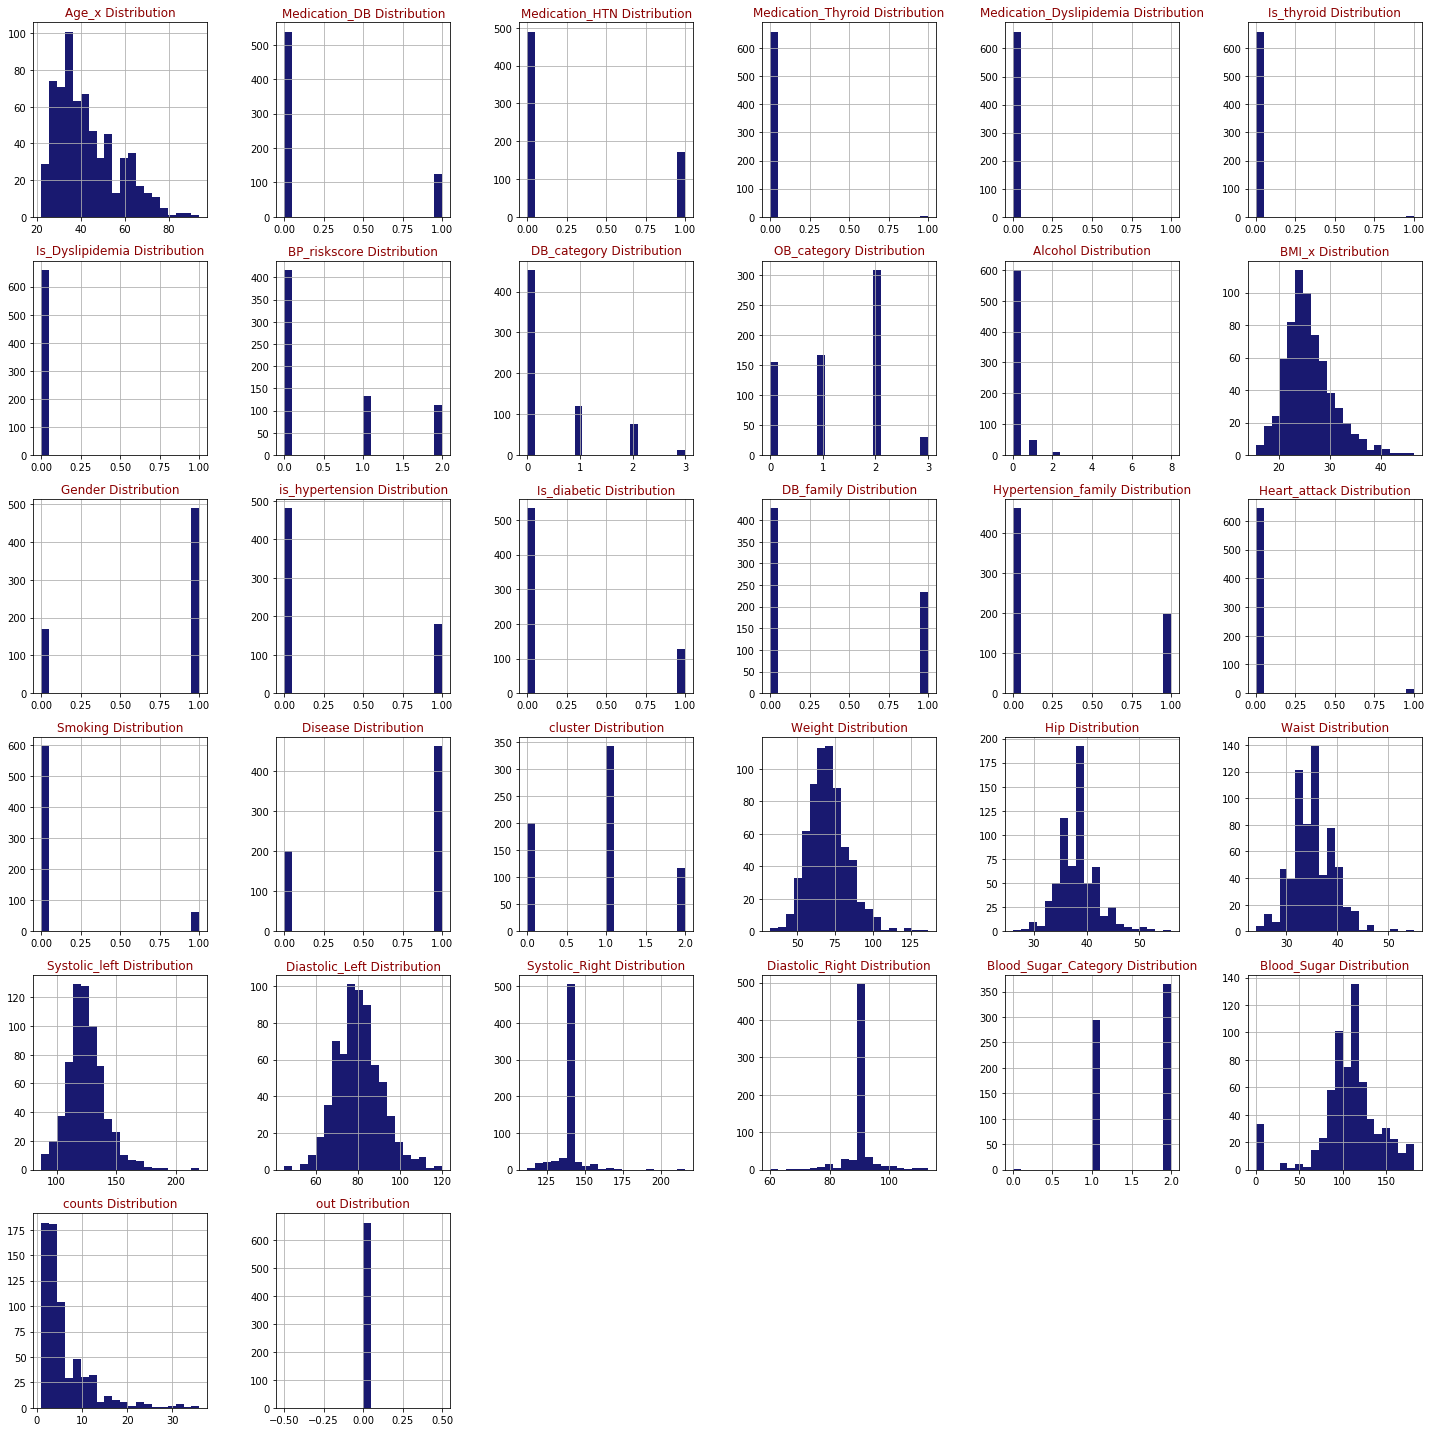

In [180]:
m[m['out'] == 1][['Age_x','BMI_x','Weight', 'Hip', 'Waist', 'Systolic_left', 'Diastolic_Left',
       'Systolic_Right', 'Diastolic_Right']].median()

Age_x               52.00
BMI_x               25.62
Weight              67.10
Hip                 38.00
Waist               35.00
Systolic_left      131.00
Diastolic_Left      86.00
Systolic_Right     138.00
Diastolic_Right     91.00
dtype: float64

In [181]:
m[m['out'] == 1][['Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid',
       'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category',
       'Alcohol', 'Gender', 'is_hypertension', 'Is_diabetic',
       'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking',
       'Disease']].mode()

,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0,1,0,1,0,0,0,0,1


In [188]:
m1 = m[m['out']==1]

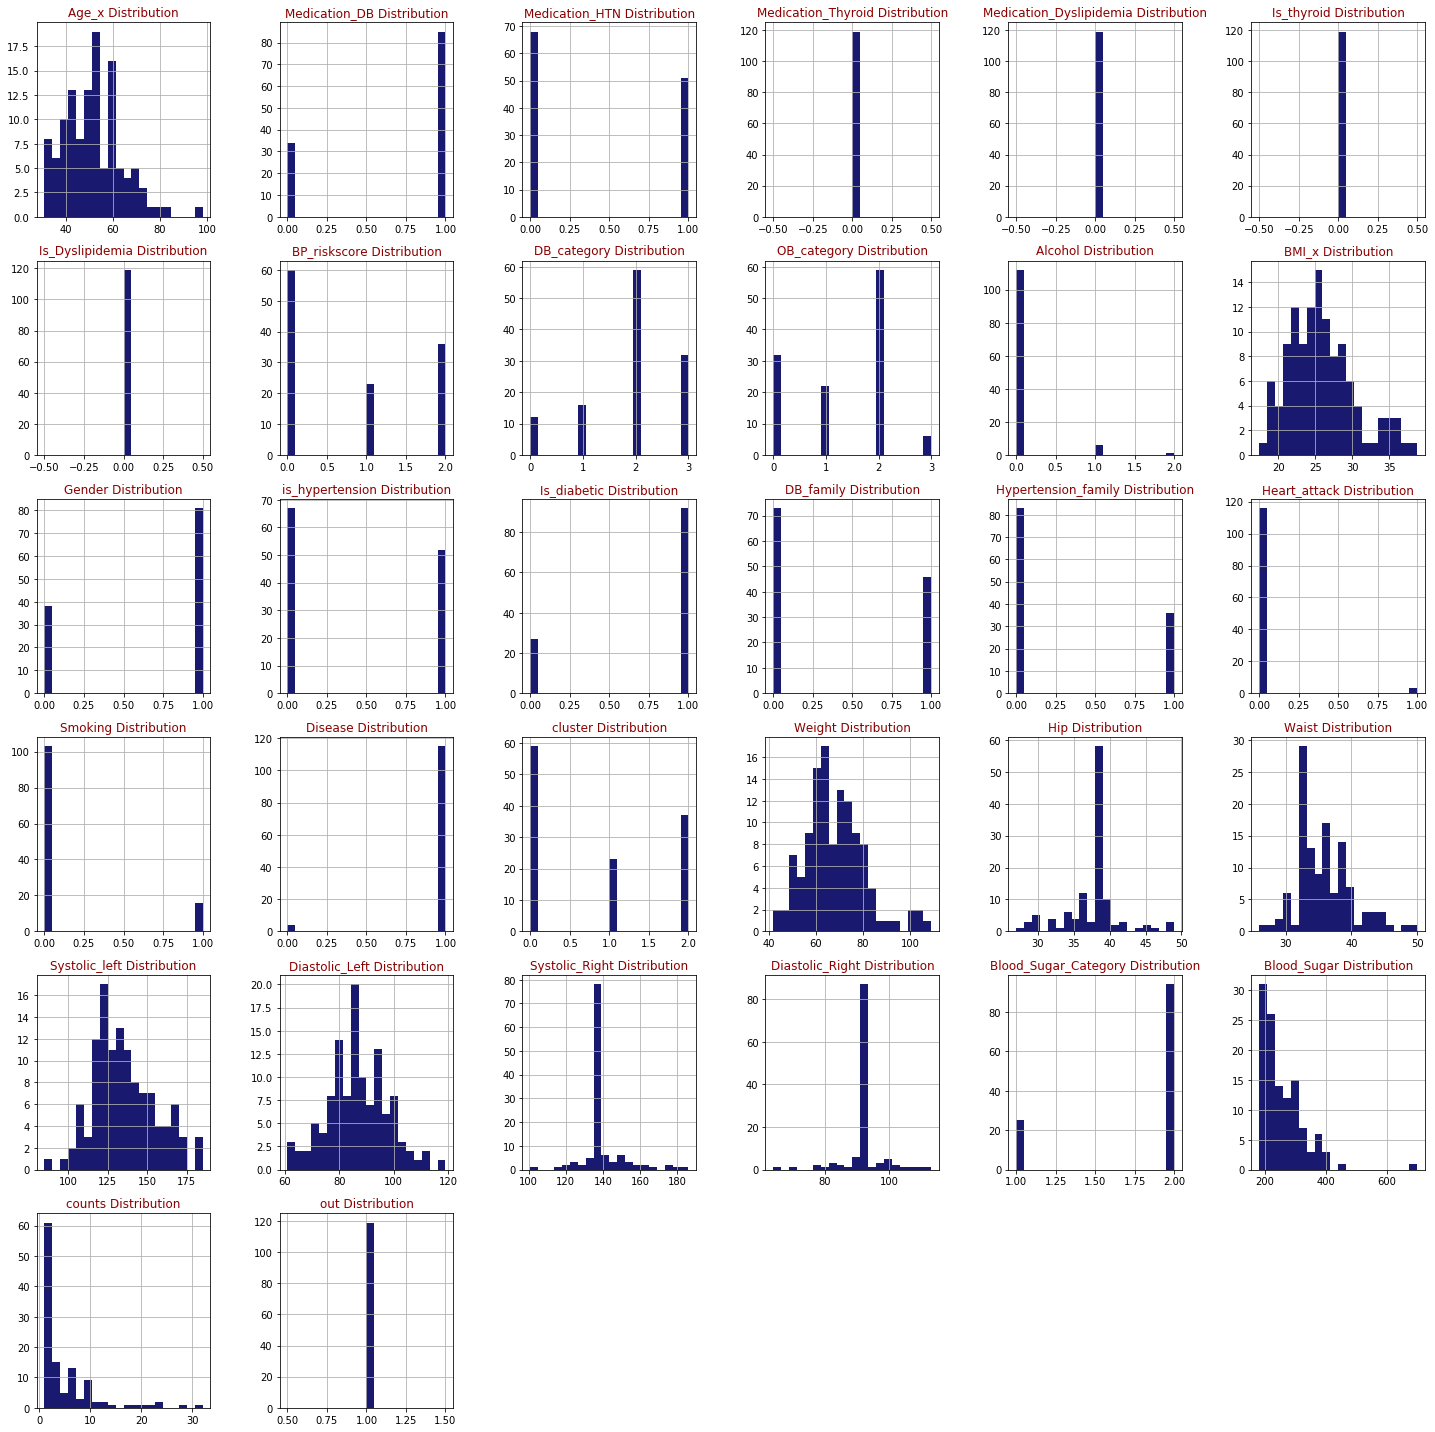

In [189]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(m1,m1.columns,6,6)

In [190]:
m['Gender'].value_counts()

1    571
0    209
Name: Gender, dtype: int64

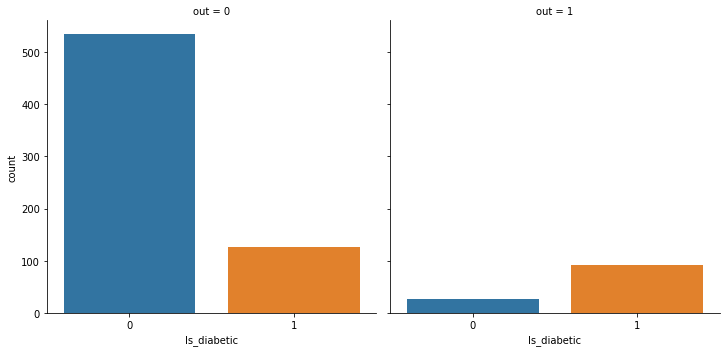

In [214]:
g = sns.catplot("Is_diabetic", col="out",
                data=m,
                kind="count")

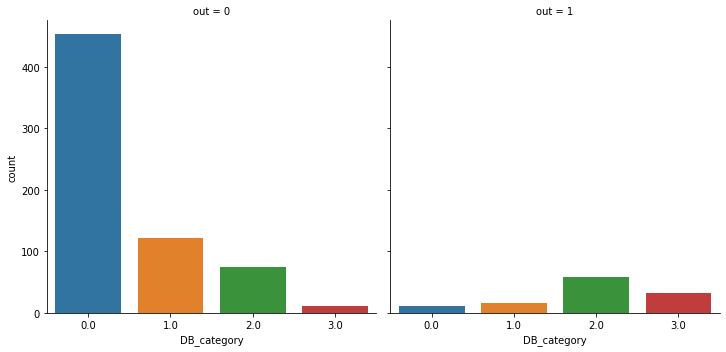

In [216]:
g = sns.catplot("DB_category", col="out",
                data=m,
                kind="count")

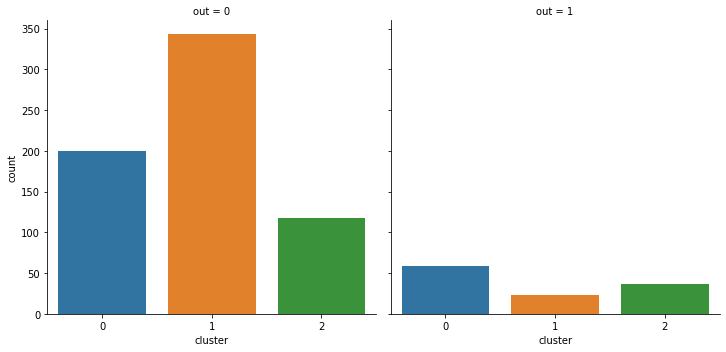

In [217]:
g = sns.catplot("cluster", col="out",
                data=m,
                kind="count")